## Визуализация с `matplotlib`: часть 1

*Алла Тамбовцева, НИУ ВШЭ*

### Знакомство с функцией  `plot()`

Для начала импортируем модуль `pyplot` из библиотеки `matplotlib` с сокращенным названием `plt`:

In [1]:
from matplotlib import pyplot as plt

Это основной модуль для графики, в котором хранятся функции для построения графиков (графики математических функций и графики для визуализации данных, например, гистограммы и диаграммы рассеивания). Мы начнем наше знакомство с библиотекой с функции `plot()`. 
Посмотрим, что будет делать эта функция, если мы подадим ей на вход просто список из чисел:

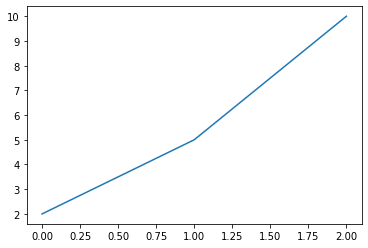

In [2]:
plt.plot([2, 5, 10]) 

В таком простом случае функция отмечает по горизонтальной оси индексы элементов списка, а по вертикальной – сами элементы. Не самое интересное, но иногда может быть полезно. Стоит заметить, что графические функции `matplotlib` возвращают не сам график, а списки или более сложные коллекции графических элементов, просто Jupyter Notebook или Google Colab сразу показывает содержимое ячейки – картинку. В данном случае функция `plot()` вернула список из одного объекта `matplotlib.lines.Line2D`, набора линий двумерного графика, который хранится в некоторой ячейке памяти. Чтобы не выводить эту лишнюю информацию на экран, после строки кода для построения графика можно добавить точку с запятой: 

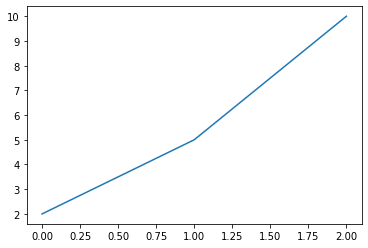

In [3]:
plt.plot([2, 5, 10]);

А если на вход функции `plot()` подать два списка с числами? Посмотрим:

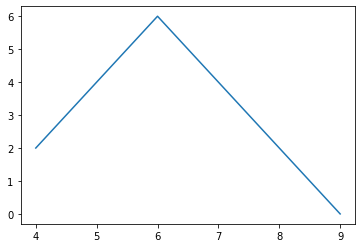

In [4]:
plt.plot([4, 6, 9], [2, 6, 0]);

Получаем обычный график, построенный по точкам: Python воспринимает первый список как набор координат по оси X, а второй список – как набор координат по оси Y. По умолчанию функция `plot()` всегда соединяет точки линиями, поэтому если бы нам понадобилась диаграмма рассеивания, нам пришлось бы добавлять дополнительные опции и «выключать» отрисовку линий. Это нестрашно, мы позже посмотрим на то, как это делается (вообще для диаграмм рассеивания идеально подходит более новая функция `scatter()`, у нее больше опций для настройки маркеров для точек, правда, работает она немного медленнее), а пока построим линейные графики для отображения динамики показателей. 

Перейдем к реальным данным!

### Загрузка и предобработка данных 

Импортируем библиотеки `pandas` и `numpy` с сокращенными названиями (`numpy` понадобится позже, но загрузим сейчас):

In [5]:
import pandas as pd
import numpy as np

Загрузим данные по температуре воздуха в Рио-де-Жанейро в 1973-2019 годах и сохраним их в датафрейм `df`:

In [6]:
df = pd.read_csv("station_rio.csv")

Посмотрим на первые несколько строк:

In [7]:
df.head()

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1973  27.73  27.97  25.70  26.49  22.42  22.76  22.14  21.03  21.46  22.46   
1  1974  26.68  27.16  26.56  23.94  22.76  20.70  21.20  21.81  22.91  22.80   
2  1975  25.27  26.92  26.43  22.82  21.37  20.50  19.68  22.98  22.40  22.65   
3  1976  27.48  26.20  25.55  24.99  22.01  21.18  20.14  21.15  21.27  22.06   
4  1977  27.13  28.51  26.88  24.22  22.35  22.13  23.07  22.29  22.44  23.92   

     NOV    DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
0  23.06  25.85  27.45  24.87  21.98  22.33   24.16  
1  24.51  24.54  26.56  24.42  21.24  23.41   23.91  
2  24.11  26.53  25.58  23.54  21.05  23.05   23.31  
3  24.40  25.56  26.74  24.18  20.82  22.58   23.58  
4  24.48  24.84  27.07  24.48  22.50  23.61   24.42

А теперь на описательные статистики:

In [8]:
df.describe()

YEAR         JAN         FEB         MAR         APR  \
count    47.000000   47.000000   47.000000   47.000000   47.000000   
mean   1996.000000  110.087021  151.711064   88.692128   87.341277   
std      13.711309  274.327517  327.980278  240.504860  240.862668   
min    1973.000000   23.860000   25.690000   24.800000   22.730000   
25%    1984.500000   26.715000   27.185000   26.220000   24.580000   
50%    1996.000000   27.480000   27.960000   26.570000   25.090000   
75%    2007.500000   28.575000   28.530000   27.220000   26.010000   
max    2019.000000  999.900000  999.900000  999.900000  999.900000   

              MAY         JUN         JUL         AUG         SEP         OCT  \
count   47.000000   47.000000   47.000000   47.000000   47.000000   47.000000   
mean   105.961702   84.027234  104.484255  105.158298  105.589362   86.071064   
std    275.597282  241.736716  276.053390  275.845350  275.712484  241.197722   
min     21.370000   19.740000   19.240000   19.950000   20.530000   21.620000   
25%     22.300000   20.920000   20.655000   21.240000   21.785000   23.050000   
50%     22.870000   21.500000   21.320000   22.070000   22.440000   23.670000   
75%     23.395000   22.670000   21.970000   22.660000   23.280000   24.700000   
max    999.900000  999.900000  999.900000  999.900000  999.900000  999.900000   

              NOV         DEC       D-J-F       M-A-M       J-J-A       S-O-N  \
count   47.000000   47.000000   47.000000   47.000000   47.000000   47.000000   
mean   107.822553  129.836170  109.842979   87.073191  104.832340   85.992979   
std    275.024153  303.447244  274.400877  240.931949  275.945192  241.217247   
min     23.040000   24.540000   25.070000   23.100000   20.110000   22.330000   
25%     24.335000   25.715000   26.515000   24.490000   21.165000   23.065000   
50%     24.850000   26.170000   27.070000   24.780000   21.720000   23.670000   
75%     25.650000   27.115000   27.850000   25.490000   22.195000   24.330000   
max    999.900000  999.900000  999.900000  999.900000  999.900000  999.900000   

           metANN  
count   47.000000  
mean   107.322128  
std    275.177349  
min     23.310000  
25%     23.985000  
50%     24.330000  
75%     24.805000  
max    999.900000

Проблема: максимальное значение температуры в каждом месяце – 999.9. В Бразилии, конечно, довольно жарко, но не настолько. Таким значением в файле закодированы пропущенные значения:

In [9]:
df[df["NOV"] == 999.9]

YEAR    JAN     FEB     MAR     APR     MAY     JUN     JUL    AUG  \
12  1985  25.53  999.90  999.90  999.90  999.90  999.90  999.90  999.9   
20  1993  27.48   27.25   26.81   25.68   22.85   20.98  999.90  999.9   
30  2003  26.94  999.90  999.90  999.90  999.90  999.90  999.90  999.9   
46  2019  30.25   28.05   27.50   26.55   24.85   23.10   21.75   22.3   

       SEP     OCT    NOV    DEC  D-J-F   M-A-M   J-J-A   S-O-N  metANN  
12  999.90  999.90  999.9  999.9  25.65  999.90  999.90  999.90  999.90  
20  999.90  999.90  999.9  999.9  26.70   25.11  999.90  999.90  999.90  
30  999.90  999.90  999.9  999.9  26.96  999.90  999.90  999.90  999.90  
46   23.05   25.25  999.9  999.9  28.62   26.30   22.38   24.74   25.51

Давайте от них избавимся, но аккуратно. Совсем удалять строки с пропусками в нашем случае не стоит – мы потеряем годы, что нехорошо для отображения динамики, так как по горизонтальной оси графика мы не получим одинакового шага в один год. Заменить значения 999.9 на обычные пропуски вида `NaN` или `None` – тоже неудачное решение, на графике образуются «дырки». Лучшее решение – заполнить эти пропуски, просто взяв значение прошлого года (технически – значение из ячейки выше в столбце). 

Тут нам пригодится метод `.replace()`. Единственное, в разных версиях `pandas` он работает немного по-разному, поэтому заполнение пропусков мы разобьем на два шага. У кого на первом шаге все заполнится как нужно, второй шаг можно опустить. 

*Шаг 1.* Заменяем значения 999.9 на пустые значения `None`. По умолчанию метод `.replace()` (версия `pandas` 1.3.5, не самая новая, узнать версию можно, запустив `pd.__version__`) работает так: заменяет все значения, совпадающие с аргументом `to_replace` на значение аргумента `value`, а если в `value` стоит `None`, забирает значение из ячейки выше по столбцу. 

In [10]:
df = df.replace(to_replace = 999.9, value = None)
df

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0   1973  27.73  27.97  25.70  26.49  22.42  22.76  22.14  21.03  21.46   
1   1974  26.68  27.16  26.56  23.94  22.76  20.70  21.20  21.81  22.91   
2   1975  25.27  26.92  26.43  22.82  21.37  20.50  19.68  22.98  22.40   
3   1976  27.48  26.20  25.55  24.99  22.01  21.18  20.14  21.15  21.27   
4   1977  27.13  28.51  26.88  24.22  22.35  22.13  23.07  22.29  22.44   
5   1978  27.44  26.55  26.42  23.39  21.85  20.03  21.94  21.28  22.49   
6   1979  23.86  25.69  24.80  23.36  23.05  20.30  20.29  22.42  22.05   
7   1980  25.39  27.24  27.83  24.63  23.41  21.20  21.81  22.22  21.05   
8   1981  27.42  28.06  26.26  23.85  22.87  20.94  19.90  21.50  23.19   
9   1982  24.55  27.51  25.00  22.73  21.58  22.44  21.30  22.34  22.41   
10  1983  26.81  27.63  25.99  24.08  23.82  21.18  21.55  20.91  20.53   
11  1984  28.56  28.85  26.54  24.46  24.77  22.91  22.20  21.00  21.91   
12  1985  25.53  28.85  26.54  24.46  24.77  22.91  22.20  21.00  21.91   
13  1986  25.53  27.93  26.95  25.97  24.77  22.70  21.09  22.66  21.46   
14  1987  27.68  27.25  25.86  25.85  22.73  20.48  22.43  20.80  21.02   
15  1988  28.82  26.03  26.49  24.65  22.70  19.74  19.24  21.36  21.89   
16  1989  26.98  26.59  26.45  25.43  21.92  20.90  19.47  21.67  21.70   
17  1990  28.63  27.47  27.50  27.05  22.19  21.50  20.25  19.95  21.17   
18  1991  25.44  26.43  25.52  24.72  21.69  21.42  19.64  20.91  20.80   
19  1992  27.37  26.43  26.75  24.63  23.55  23.31  20.77  20.94  21.74   
20  1993  27.48  27.25  26.81  25.68  22.85  20.98  20.77  20.94  21.74   
21  1994  27.48  27.25  26.56  24.97  23.95  21.16  21.59  20.85  22.72   
22  1995  28.64  27.59  26.75  24.97  23.17  21.84  23.06  23.90  23.05   
23  1996  28.48  28.17  26.76  25.09  22.01  21.16  19.65  20.59  21.44   
24  1997  26.52  28.03  25.35  24.57  22.43  21.53  22.00  21.76  23.28   
25  1998  28.57  28.32  27.72  26.03  22.89  20.59  21.30  23.21  23.48   
26  1999  27.83  27.96  27.00  24.69  22.21  21.25  21.56  20.94  22.77   
27  2000  27.08  26.89  25.85  24.95  22.78  21.94  20.23  21.46  22.28   
28  2001  28.25  28.55  27.83  27.17  23.24  22.67  21.32  22.23  22.20   
29  2002  27.04  26.29  27.72  26.34  23.38  23.08  21.27  23.49  21.78   
30  2003  26.94  26.29  27.72  26.34  23.38  23.08  21.27  23.49  21.78   
31  2004  26.94  26.29  25.61  25.42  22.46  21.50  20.70  21.23  23.76   
32  2005  26.75  26.12  26.64  26.09  23.85  22.41  20.91  23.41  22.18   
33  2006  27.62  27.60  27.01  24.88  21.94  21.39  21.47  22.63  22.23   
34  2007  27.62  27.60  27.01  24.88  21.94  21.39  21.47  22.63  22.23   
35  2008  26.25  26.54  26.37  25.28  22.69  21.59  21.08  22.66  21.88   
36  2009  26.32  27.96  26.55  24.21  23.16  20.71  21.21  21.88  24.01   
37  2010  28.58  29.10  26.49  24.59  22.87  20.35  21.93  21.25  22.74   
38  2011  28.14  28.69  25.50  25.48  21.86  20.52  20.61  22.32  21.79   
39  2012  25.87  27.90  26.57  25.29  22.25  22.67  21.67  22.07  23.02   
40  2013  26.13  28.18  26.18  24.20  22.94  22.59  20.86  21.71  23.42   
41  2014  28.99  28.95  27.59  25.99  23.29  22.84  21.44  22.64  23.89   
42  2015  29.93  28.43  26.78  25.93  23.18  21.98  22.93  23.53  23.28   
43  2016  27.08  28.98  27.43  27.93  22.93  20.53  21.53  23.23  23.03   
44  2017  28.92  28.27  26.97  25.52  22.57  21.97  20.02  22.42  24.22   
45  2018  28.06  27.21  27.81  26.26  23.81  22.91  22.96  21.91  23.71   
46  2019  30.25  28.05  27.50  26.55  24.85  23.10  21.75  22.30  23.05   

      OCT    NOV    DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
0   22.46  23.06  25.85  27.45  24.87  21.98  22.33   24.16  
1   22.80  24.51  24.54  26.56  24.42  21.24  23.41   23.91  
2   22.65  24.11  26.53  25.58  23.54  21.05  23.05   23.31  
3   22.06  24.40  25.56  26.74  24.18  20.82  22.58   23.58  
4   23.92  24.48  24.84  27.07  24.48  22.50  23.61   24.42  
5   23.51  25.00  25.66  26.28 

Обратите внимание на годы 1985, 1993, 2003, 2019: если в этих строках остались `None`, то произошла обычная замена на пропуски, поэтому пропуски надо заполнить.

*Шаг 2*. Заполняем значения `None` с помощью метода `ffill` (от *forward fill* – заполнение сверху вниз, значение подставляется из предыдущей ячейки):

In [11]:
df = df.fillna(method = 'ffill')
df

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0   1973  27.73  27.97  25.70  26.49  22.42  22.76  22.14  21.03  21.46   
1   1974  26.68  27.16  26.56  23.94  22.76  20.70  21.20  21.81  22.91   
2   1975  25.27  26.92  26.43  22.82  21.37  20.50  19.68  22.98  22.40   
3   1976  27.48  26.20  25.55  24.99  22.01  21.18  20.14  21.15  21.27   
4   1977  27.13  28.51  26.88  24.22  22.35  22.13  23.07  22.29  22.44   
5   1978  27.44  26.55  26.42  23.39  21.85  20.03  21.94  21.28  22.49   
6   1979  23.86  25.69  24.80  23.36  23.05  20.30  20.29  22.42  22.05   
7   1980  25.39  27.24  27.83  24.63  23.41  21.20  21.81  22.22  21.05   
8   1981  27.42  28.06  26.26  23.85  22.87  20.94  19.90  21.50  23.19   
9   1982  24.55  27.51  25.00  22.73  21.58  22.44  21.30  22.34  22.41   
10  1983  26.81  27.63  25.99  24.08  23.82  21.18  21.55  20.91  20.53   
11  1984  28.56  28.85  26.54  24.46  24.77  22.91  22.20  21.00  21.91   
12  1985  25.53  28.85  26.54  24.46  24.77  22.91  22.20  21.00  21.91   
13  1986  25.53  27.93  26.95  25.97  24.77  22.70  21.09  22.66  21.46   
14  1987  27.68  27.25  25.86  25.85  22.73  20.48  22.43  20.80  21.02   
15  1988  28.82  26.03  26.49  24.65  22.70  19.74  19.24  21.36  21.89   
16  1989  26.98  26.59  26.45  25.43  21.92  20.90  19.47  21.67  21.70   
17  1990  28.63  27.47  27.50  27.05  22.19  21.50  20.25  19.95  21.17   
18  1991  25.44  26.43  25.52  24.72  21.69  21.42  19.64  20.91  20.80   
19  1992  27.37  26.43  26.75  24.63  23.55  23.31  20.77  20.94  21.74   
20  1993  27.48  27.25  26.81  25.68  22.85  20.98  20.77  20.94  21.74   
21  1994  27.48  27.25  26.56  24.97  23.95  21.16  21.59  20.85  22.72   
22  1995  28.64  27.59  26.75  24.97  23.17  21.84  23.06  23.90  23.05   
23  1996  28.48  28.17  26.76  25.09  22.01  21.16  19.65  20.59  21.44   
24  1997  26.52  28.03  25.35  24.57  22.43  21.53  22.00  21.76  23.28   
25  1998  28.57  28.32  27.72  26.03  22.89  20.59  21.30  23.21  23.48   
26  1999  27.83  27.96  27.00  24.69  22.21  21.25  21.56  20.94  22.77   
27  2000  27.08  26.89  25.85  24.95  22.78  21.94  20.23  21.46  22.28   
28  2001  28.25  28.55  27.83  27.17  23.24  22.67  21.32  22.23  22.20   
29  2002  27.04  26.29  27.72  26.34  23.38  23.08  21.27  23.49  21.78   
30  2003  26.94  26.29  27.72  26.34  23.38  23.08  21.27  23.49  21.78   
31  2004  26.94  26.29  25.61  25.42  22.46  21.50  20.70  21.23  23.76   
32  2005  26.75  26.12  26.64  26.09  23.85  22.41  20.91  23.41  22.18   
33  2006  27.62  27.60  27.01  24.88  21.94  21.39  21.47  22.63  22.23   
34  2007  27.62  27.60  27.01  24.88  21.94  21.39  21.47  22.63  22.23   
35  2008  26.25  26.54  26.37  25.28  22.69  21.59  21.08  22.66  21.88   
36  2009  26.32  27.96  26.55  24.21  23.16  20.71  21.21  21.88  24.01   
37  2010  28.58  29.10  26.49  24.59  22.87  20.35  21.93  21.25  22.74   
38  2011  28.14  28.69  25.50  25.48  21.86  20.52  20.61  22.32  21.79   
39  2012  25.87  27.90  26.57  25.29  22.25  22.67  21.67  22.07  23.02   
40  2013  26.13  28.18  26.18  24.20  22.94  22.59  20.86  21.71  23.42   
41  2014  28.99  28.95  27.59  25.99  23.29  22.84  21.44  22.64  23.89   
42  2015  29.93  28.43  26.78  25.93  23.18  21.98  22.93  23.53  23.28   
43  2016  27.08  28.98  27.43  27.93  22.93  20.53  21.53  23.23  23.03   
44  2017  28.92  28.27  26.97  25.52  22.57  21.97  20.02  22.42  24.22   
45  2018  28.06  27.21  27.81  26.26  23.81  22.91  22.96  21.91  23.71   
46  2019  30.25  28.05  27.50  26.55  24.85  23.10  21.75  22.30  23.05   

      OCT    NOV    DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
0   22.46  23.06  25.85  27.45  24.87  21.98  22.33   24.16  
1   22.80  24.51  24.54  26.56  24.42  21.24  23.41   23.91  
2   22.65  24.11  26.53  25.58  23.54  21.05  23.05   23.31  
3   22.06  24.40  25.56  26.74  24.18  20.82  22.58   23.58  
4   23.92  24.48  24.84  27.07  24.48  22.50  23.61   24.42  
5   23.51  25.00  25.66  26.28 

### Построение базового графика для динамики температуры

Теперь, когда с пропусками разобрались, построим график, который будет отображать динамику температуры воздуха в Рио-де-Жанейро в ноябре (средняя ноябрьская температура за разные годы):

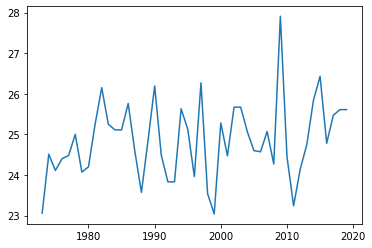

In [12]:
plt.plot(df["YEAR"], df["NOV"]);

График, в целом, понятный, но довольно маленький. Давайте построим его более продвинутым способом.

Вообще график `matplotlib` состоит из двух частей:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Так, мы можем воспользоваться функцией `subplots()` и сообщить Python, что мы хотим получить картинку размера 16 на 9 дюймов:

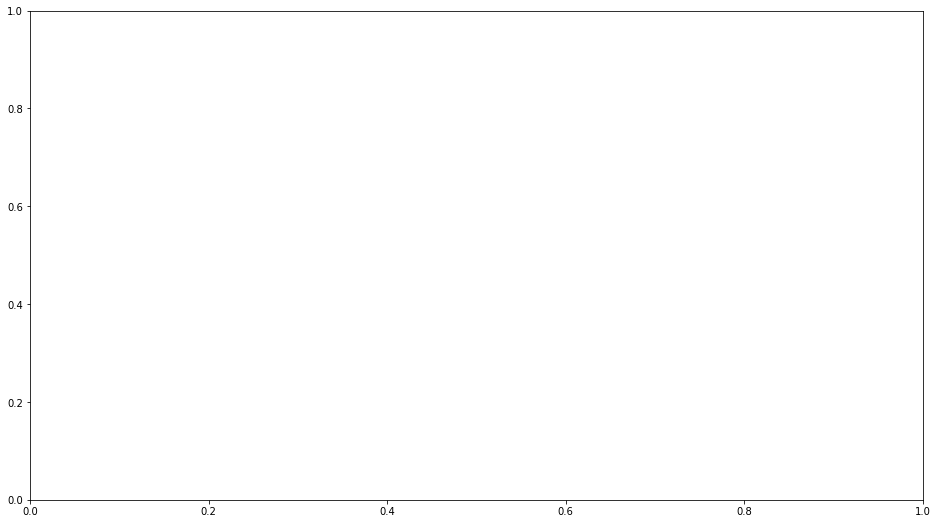

In [13]:
# множественное присваивание, subplots() возвращает сразу 2 элемента

fig, ax = plt.subplots(figsize = (16, 9)) 

Неформально, создавая `fig` мы резервируем место под картинку соответствующего размера, а затем проводим различные манипуляции с `ax`, чтобы внутри этого поля для картинки построить график, настроить подписи, оси и прочее. Соответственно, к `ax` мы будем применять различные методы, а по завершении работы сможем выгрузить объект `fig` в файл PNG или JPEG. Вообще функция `subplots()`, как следует из ее названия, может использоваться для построения сразу нескольких графиков, но у нас пока внутри `fig` будет один.

Добавляем график и сразу меняем цвет линии (обратите внимание, теперь `plot()` у нас выступает не в качестве функции из `pyplot`, а в качестве метода, который применяется к объекту `ax`):

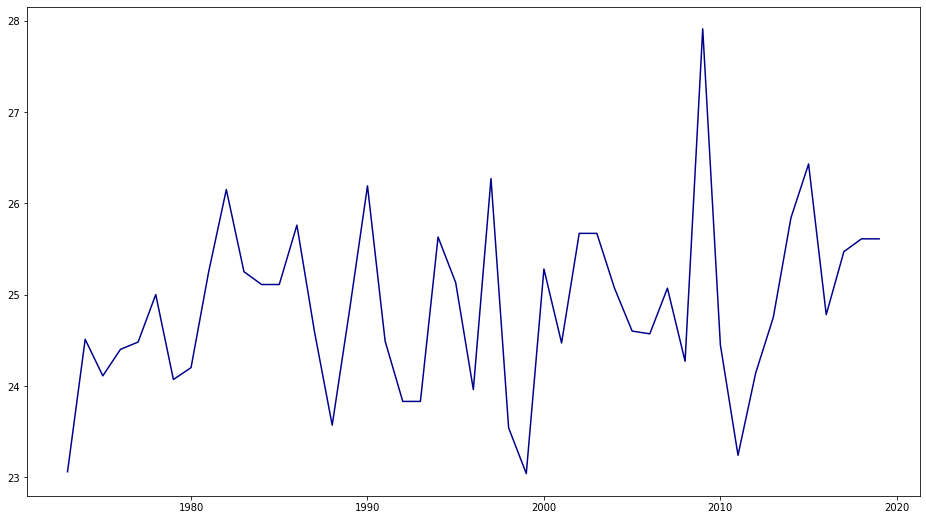

In [14]:
fig, ax = plt.subplots(figsize = (16, 9)) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue");

Если внимательно посмотреть на график, кажется, что линия не очень четкая, не хватает резкости. Эта проблема связана с разрешением картинки, по умолчанию оно не очень высокое, 100 точек на дюйм (*dpi* от *dots per inch*). Увеличим его до 300 точек, это некоторый принятый минимум для изображений, выводимых на печать:

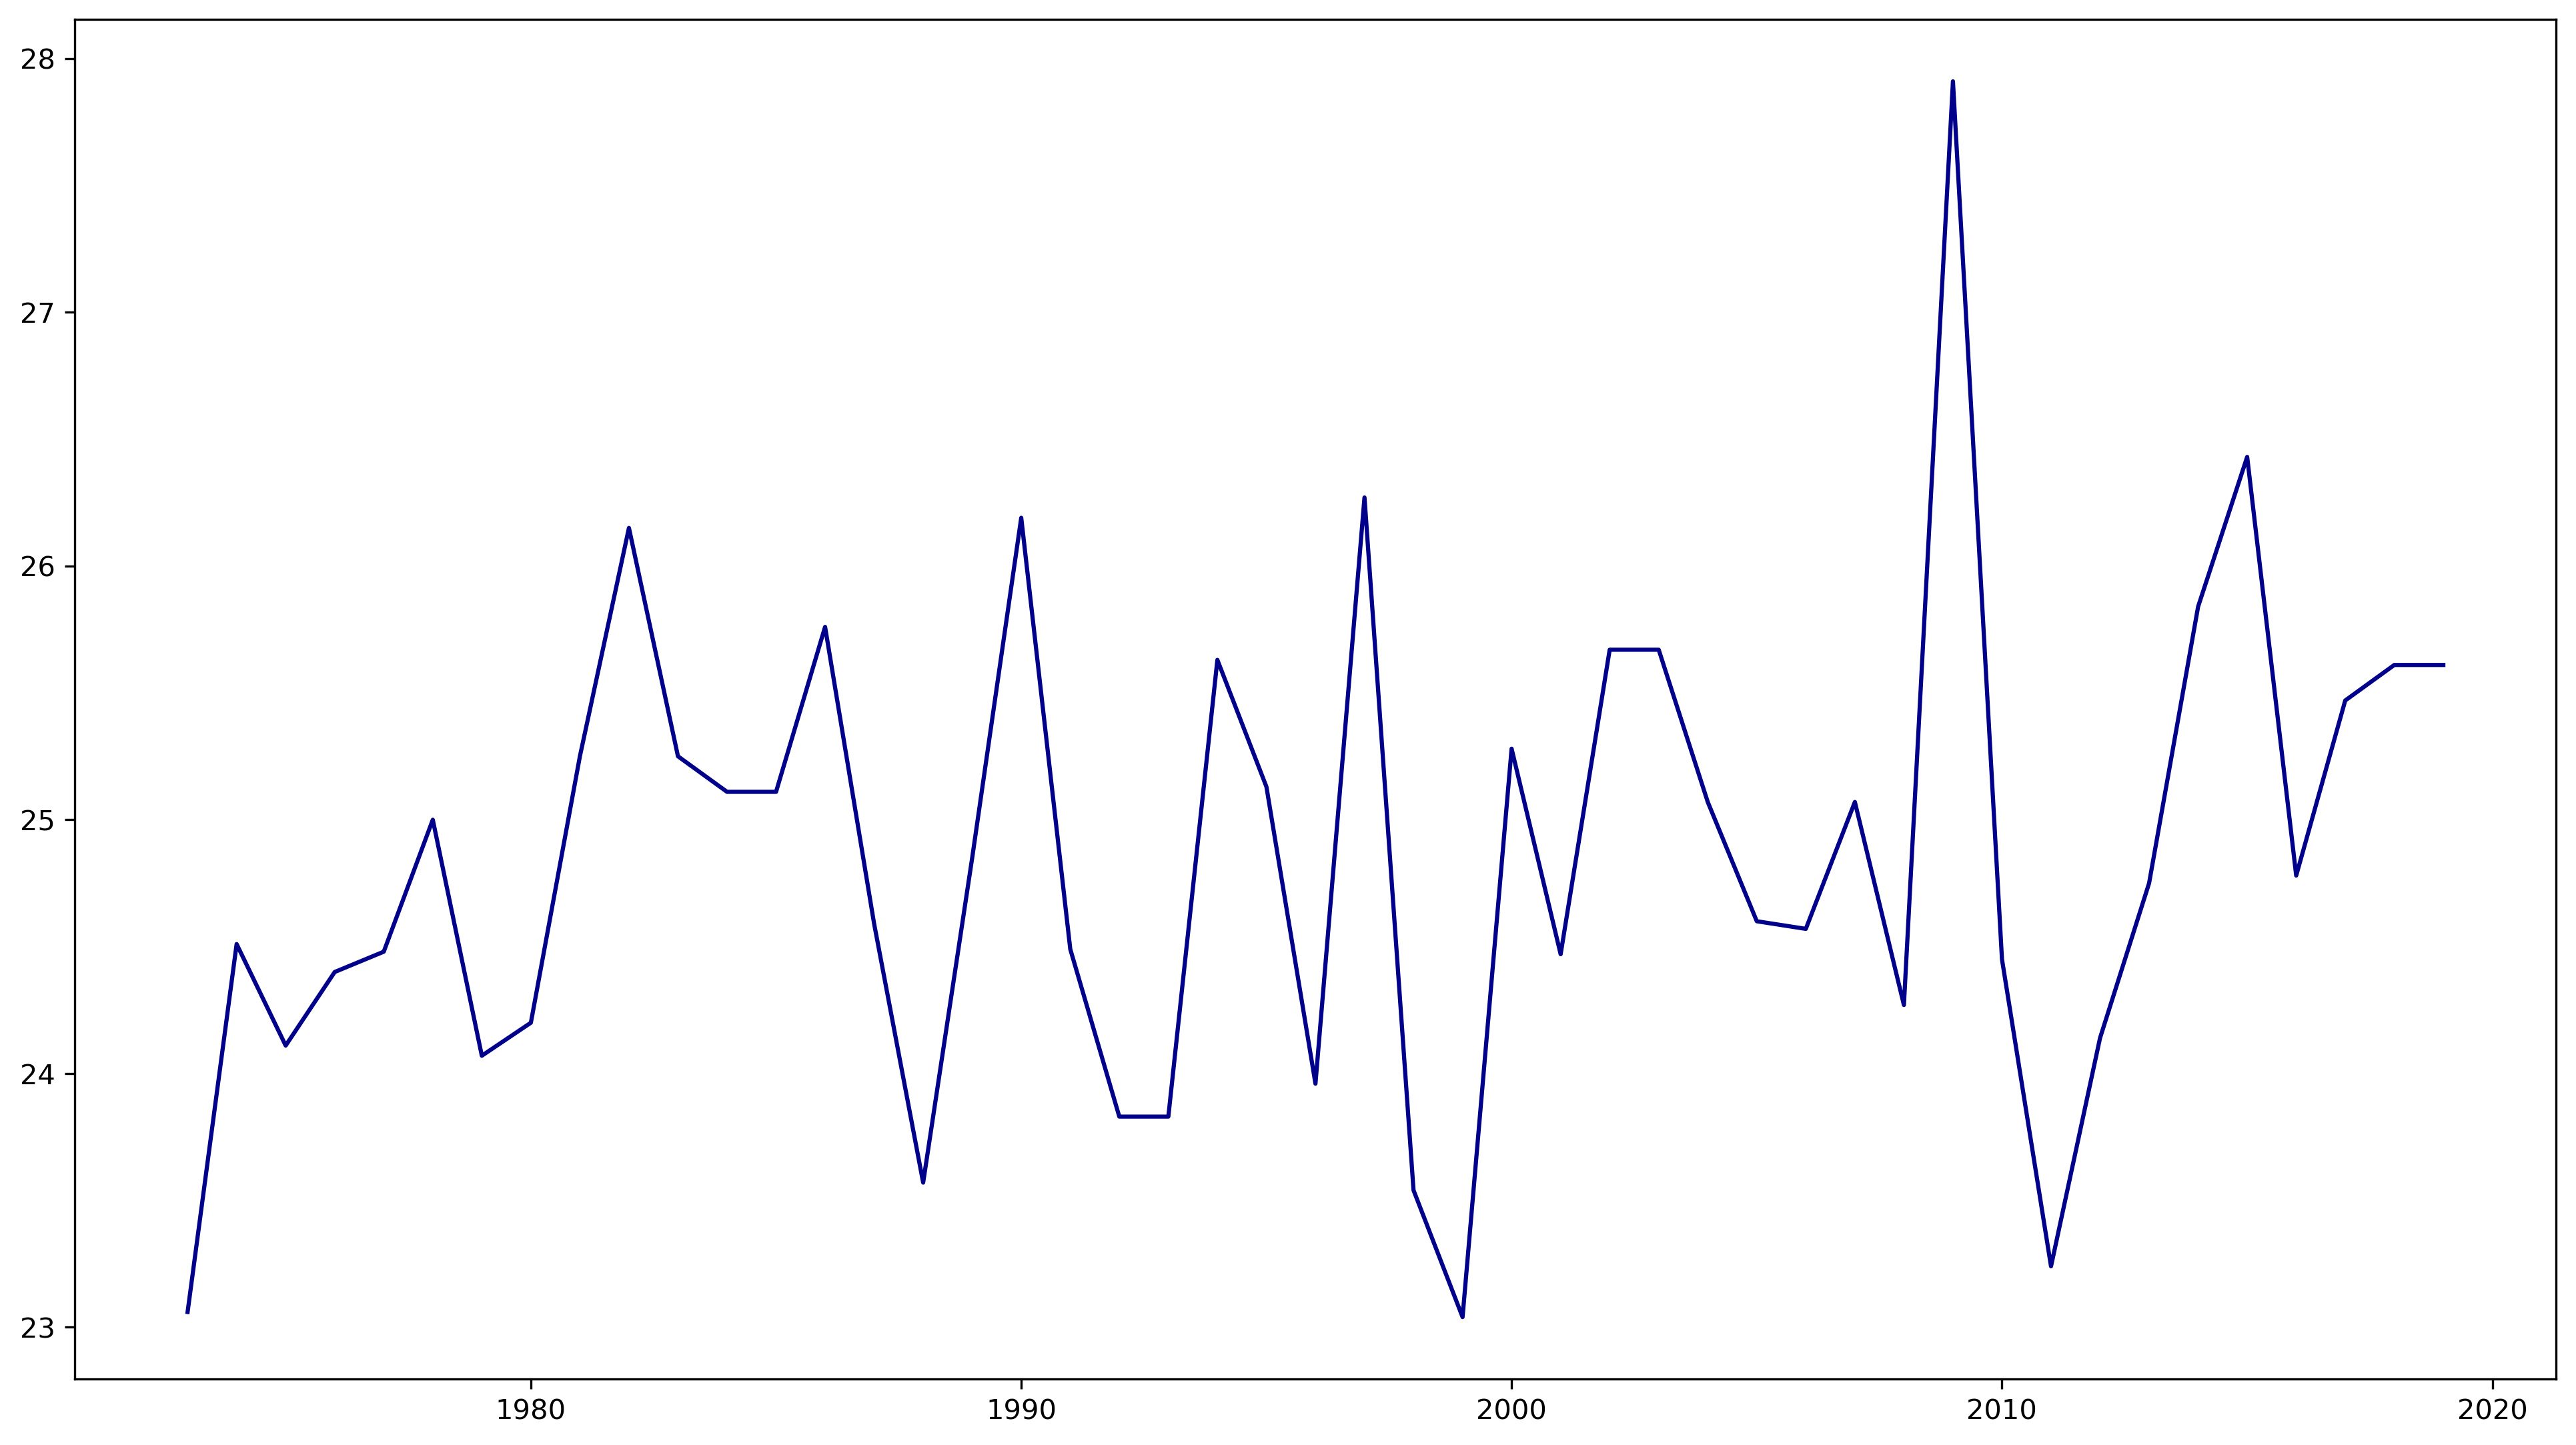

In [15]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue");

Стало получше. На список доступных опций, помимо размера, можно посмотреть в соответствующей [документации](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure).

Теперь к линии добавим точки, пока обычные:

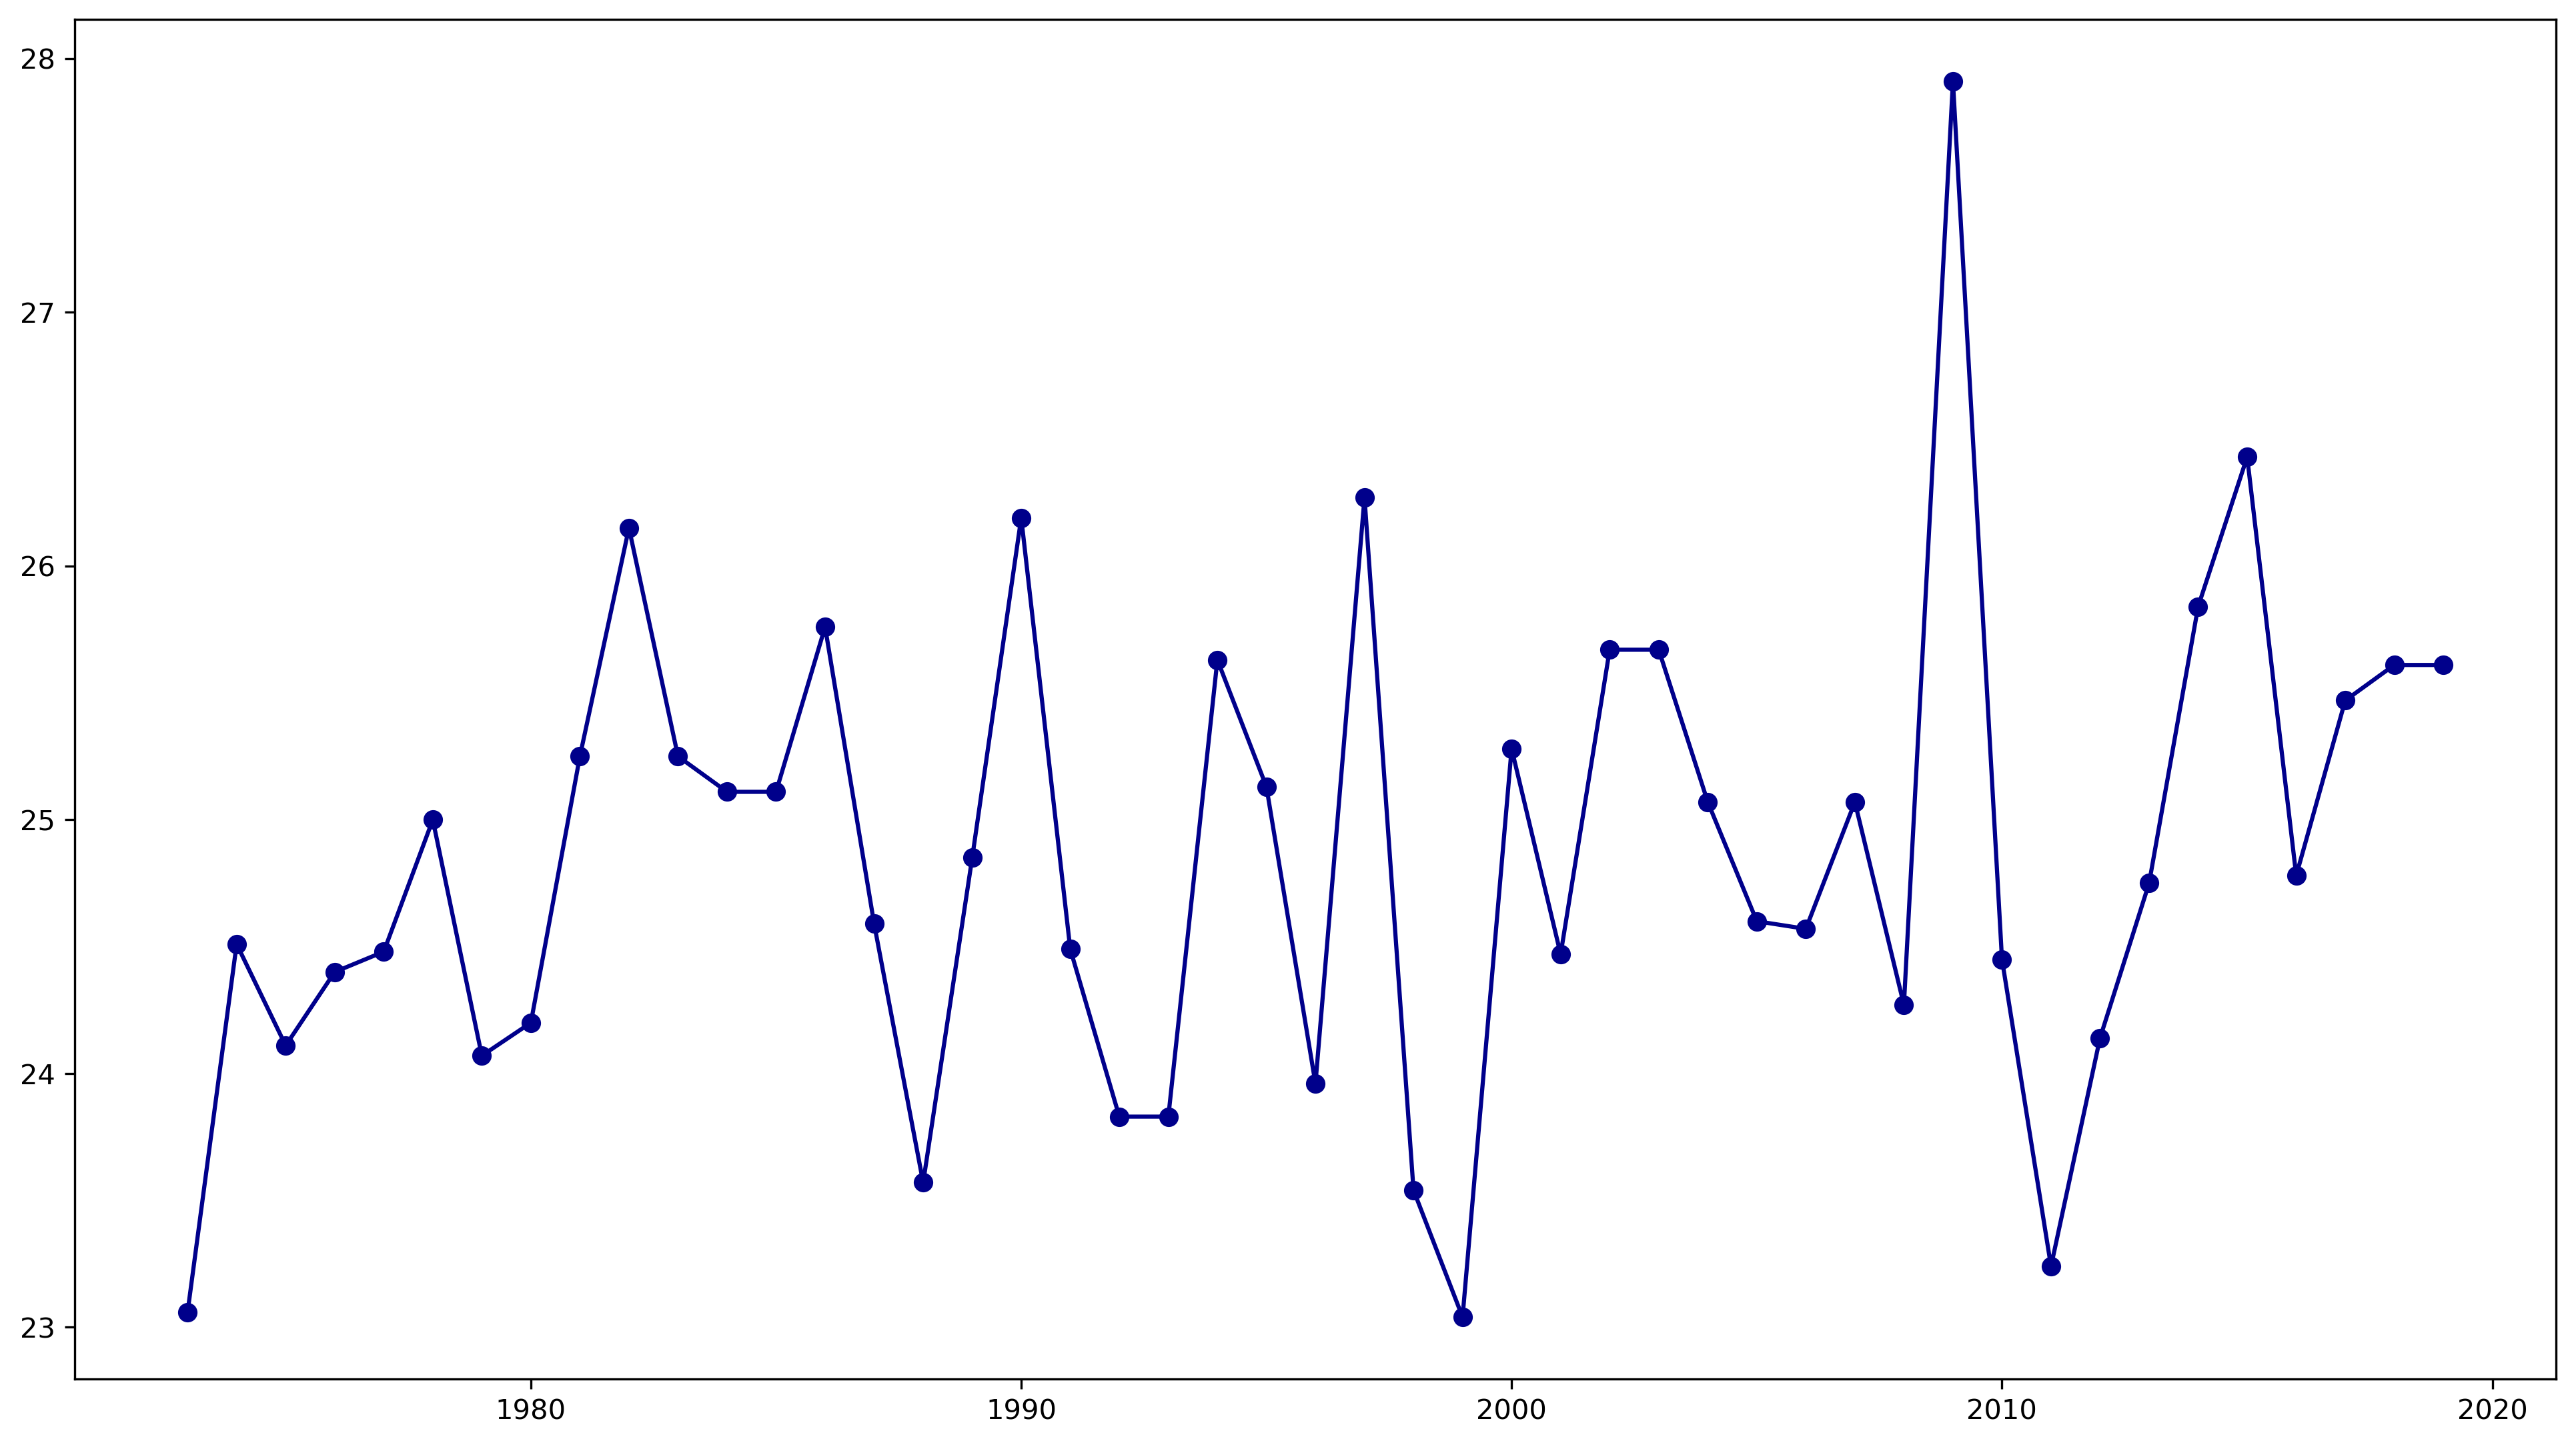

In [16]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", marker = "o");

Здесь `'o'` – это один из возможных маркеров для точек, перечень маркеров с обозначениями можно посмотреть [здесь](https://matplotlib.org/stable/api/markers_api.html). Поменяем маркеры на ромбики, а заодно настроим их размер и цвет:

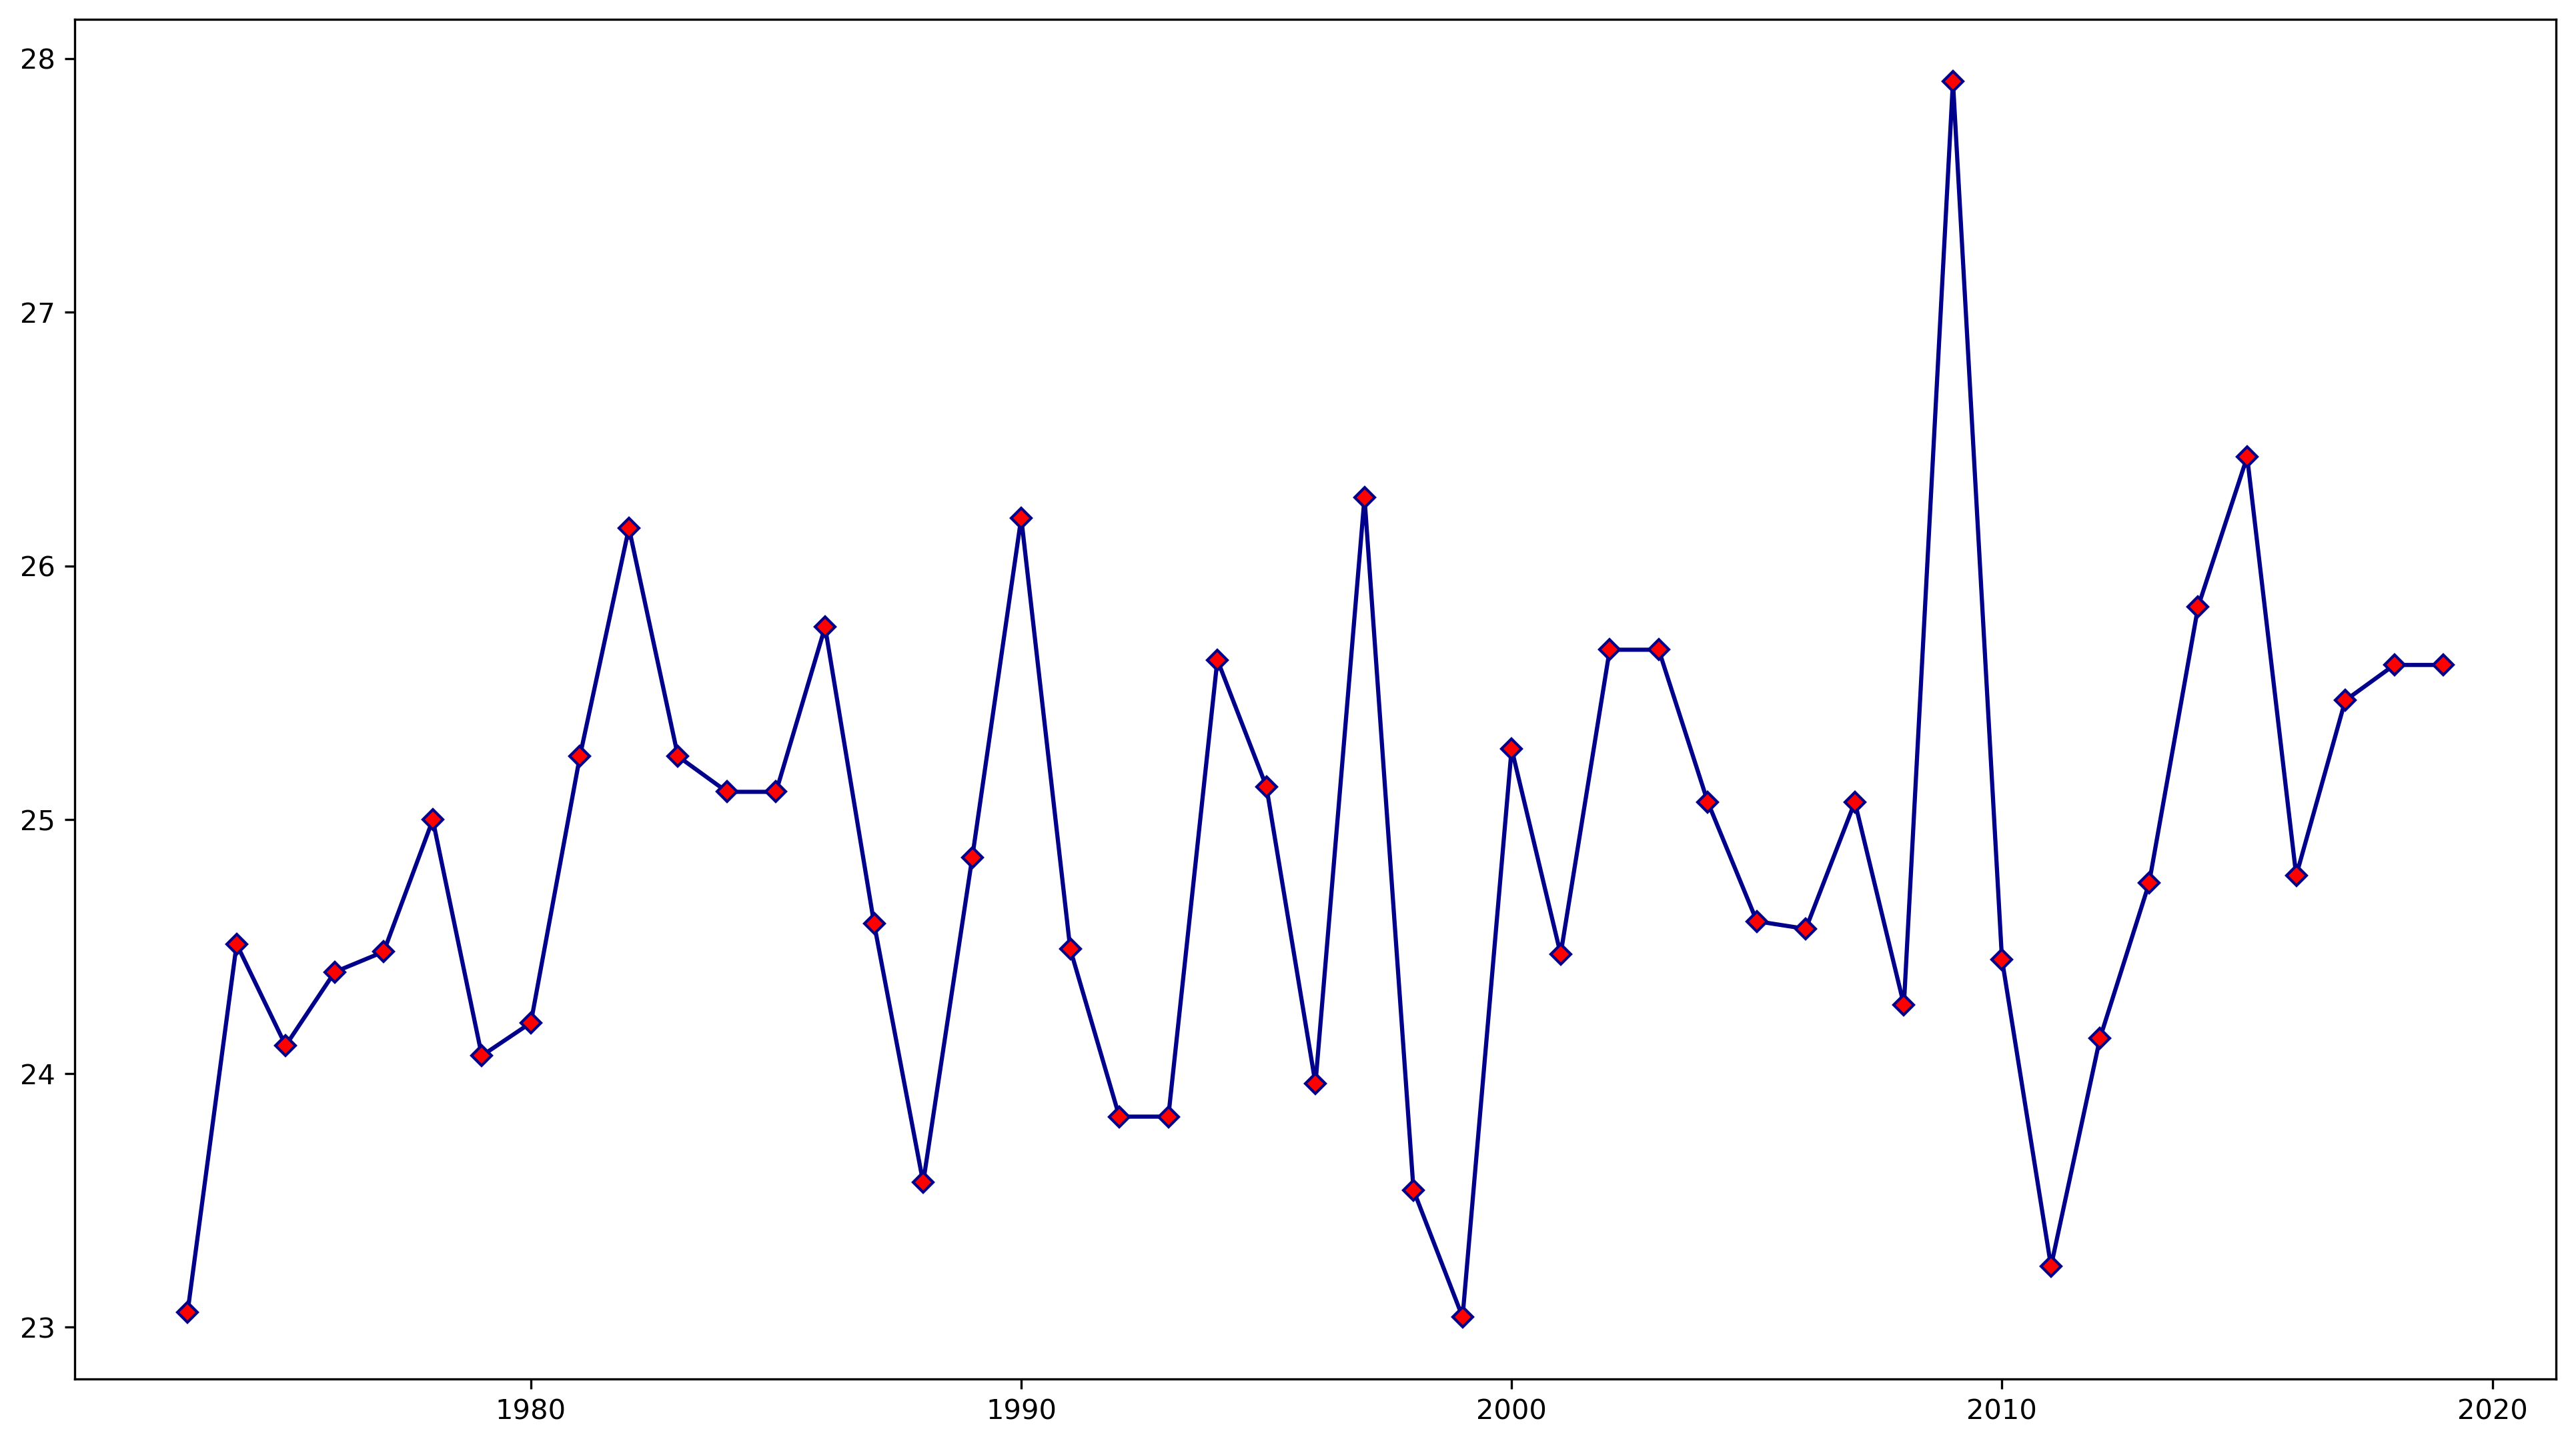

In [17]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 

# color – цвет линии
# markersize – размер точек в пунктах
# markerfacecolor – цвет заливки точек
# markeredgecolor – цвет границ точек

ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue");

### Добавление и настройка подписей,  сетка (grid)

Как можно заметить, подписи значений по осям графика не самые удачные: годы указаны с интервалом в 10 лет, а температура – с точностью до целых. Давайте это поправим – создадим свои подписи! Их можно создавать в виде списков, массивов или вообще перечней разного вида.

Для создания перечня лет воспользуемся функцией `range()`:

In [18]:
xticks = range(1973, 2020)

Для создания перечня значений температуры воспользуемся функцией `arange()` из библиотеки `numpy`, она позволяет выставлять дробный шаг:

In [19]:
yticks = np.arange(23, 28, 0.3)  # от 23 до 28 с шагом 0.3
yticks

array([23. , 23.3, 23.6, 23.9, 24.2, 24.5, 24.8, 25.1, 25.4, 25.7, 26. ,
       26.3, 26.6, 26.9, 27.2, 27.5, 27.8])

Для добавления подписей по осям нам понадобятся методы `.set_xticks()` и `.set_yticks()`:

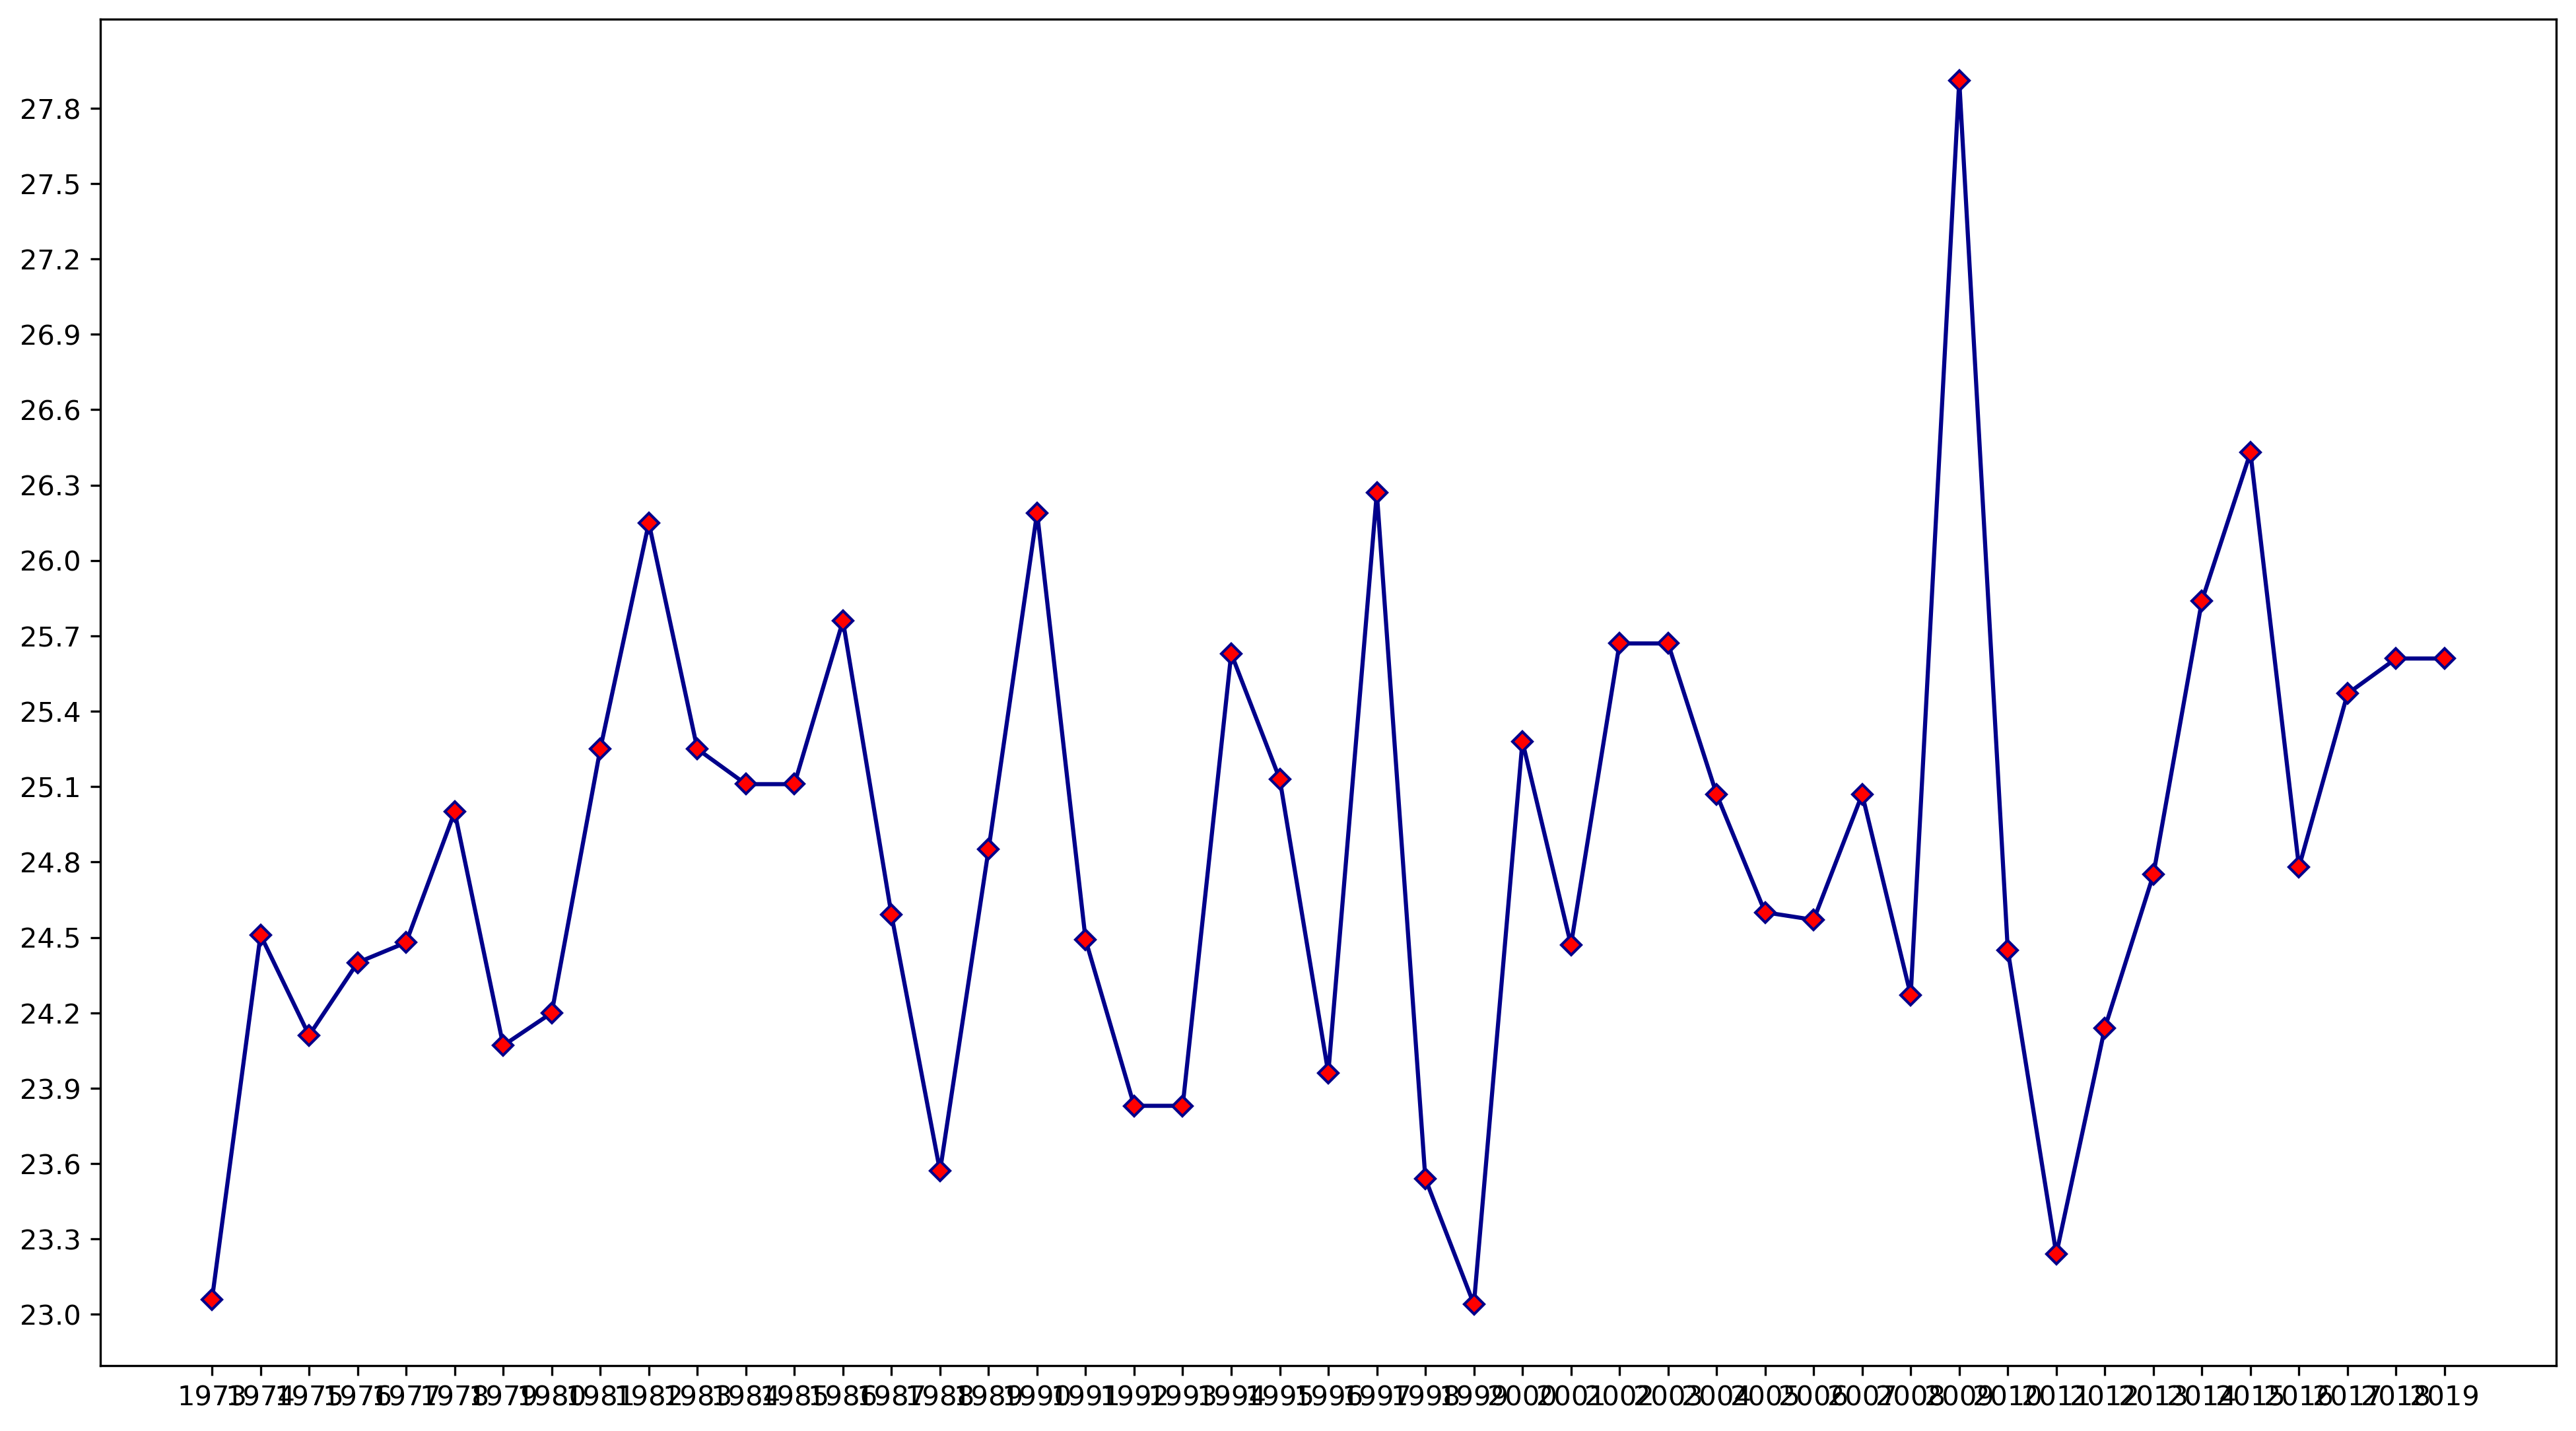

In [20]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xticks(xticks)
ax.set_yticks(yticks);

Подписи по оси X явно надо повернуть, годы накладываются друг на друга. Для этого воспользуемся методом `.set_xticklabels()` и задействуем аргумент `rotation` для поворота подписей на 45 градусов:

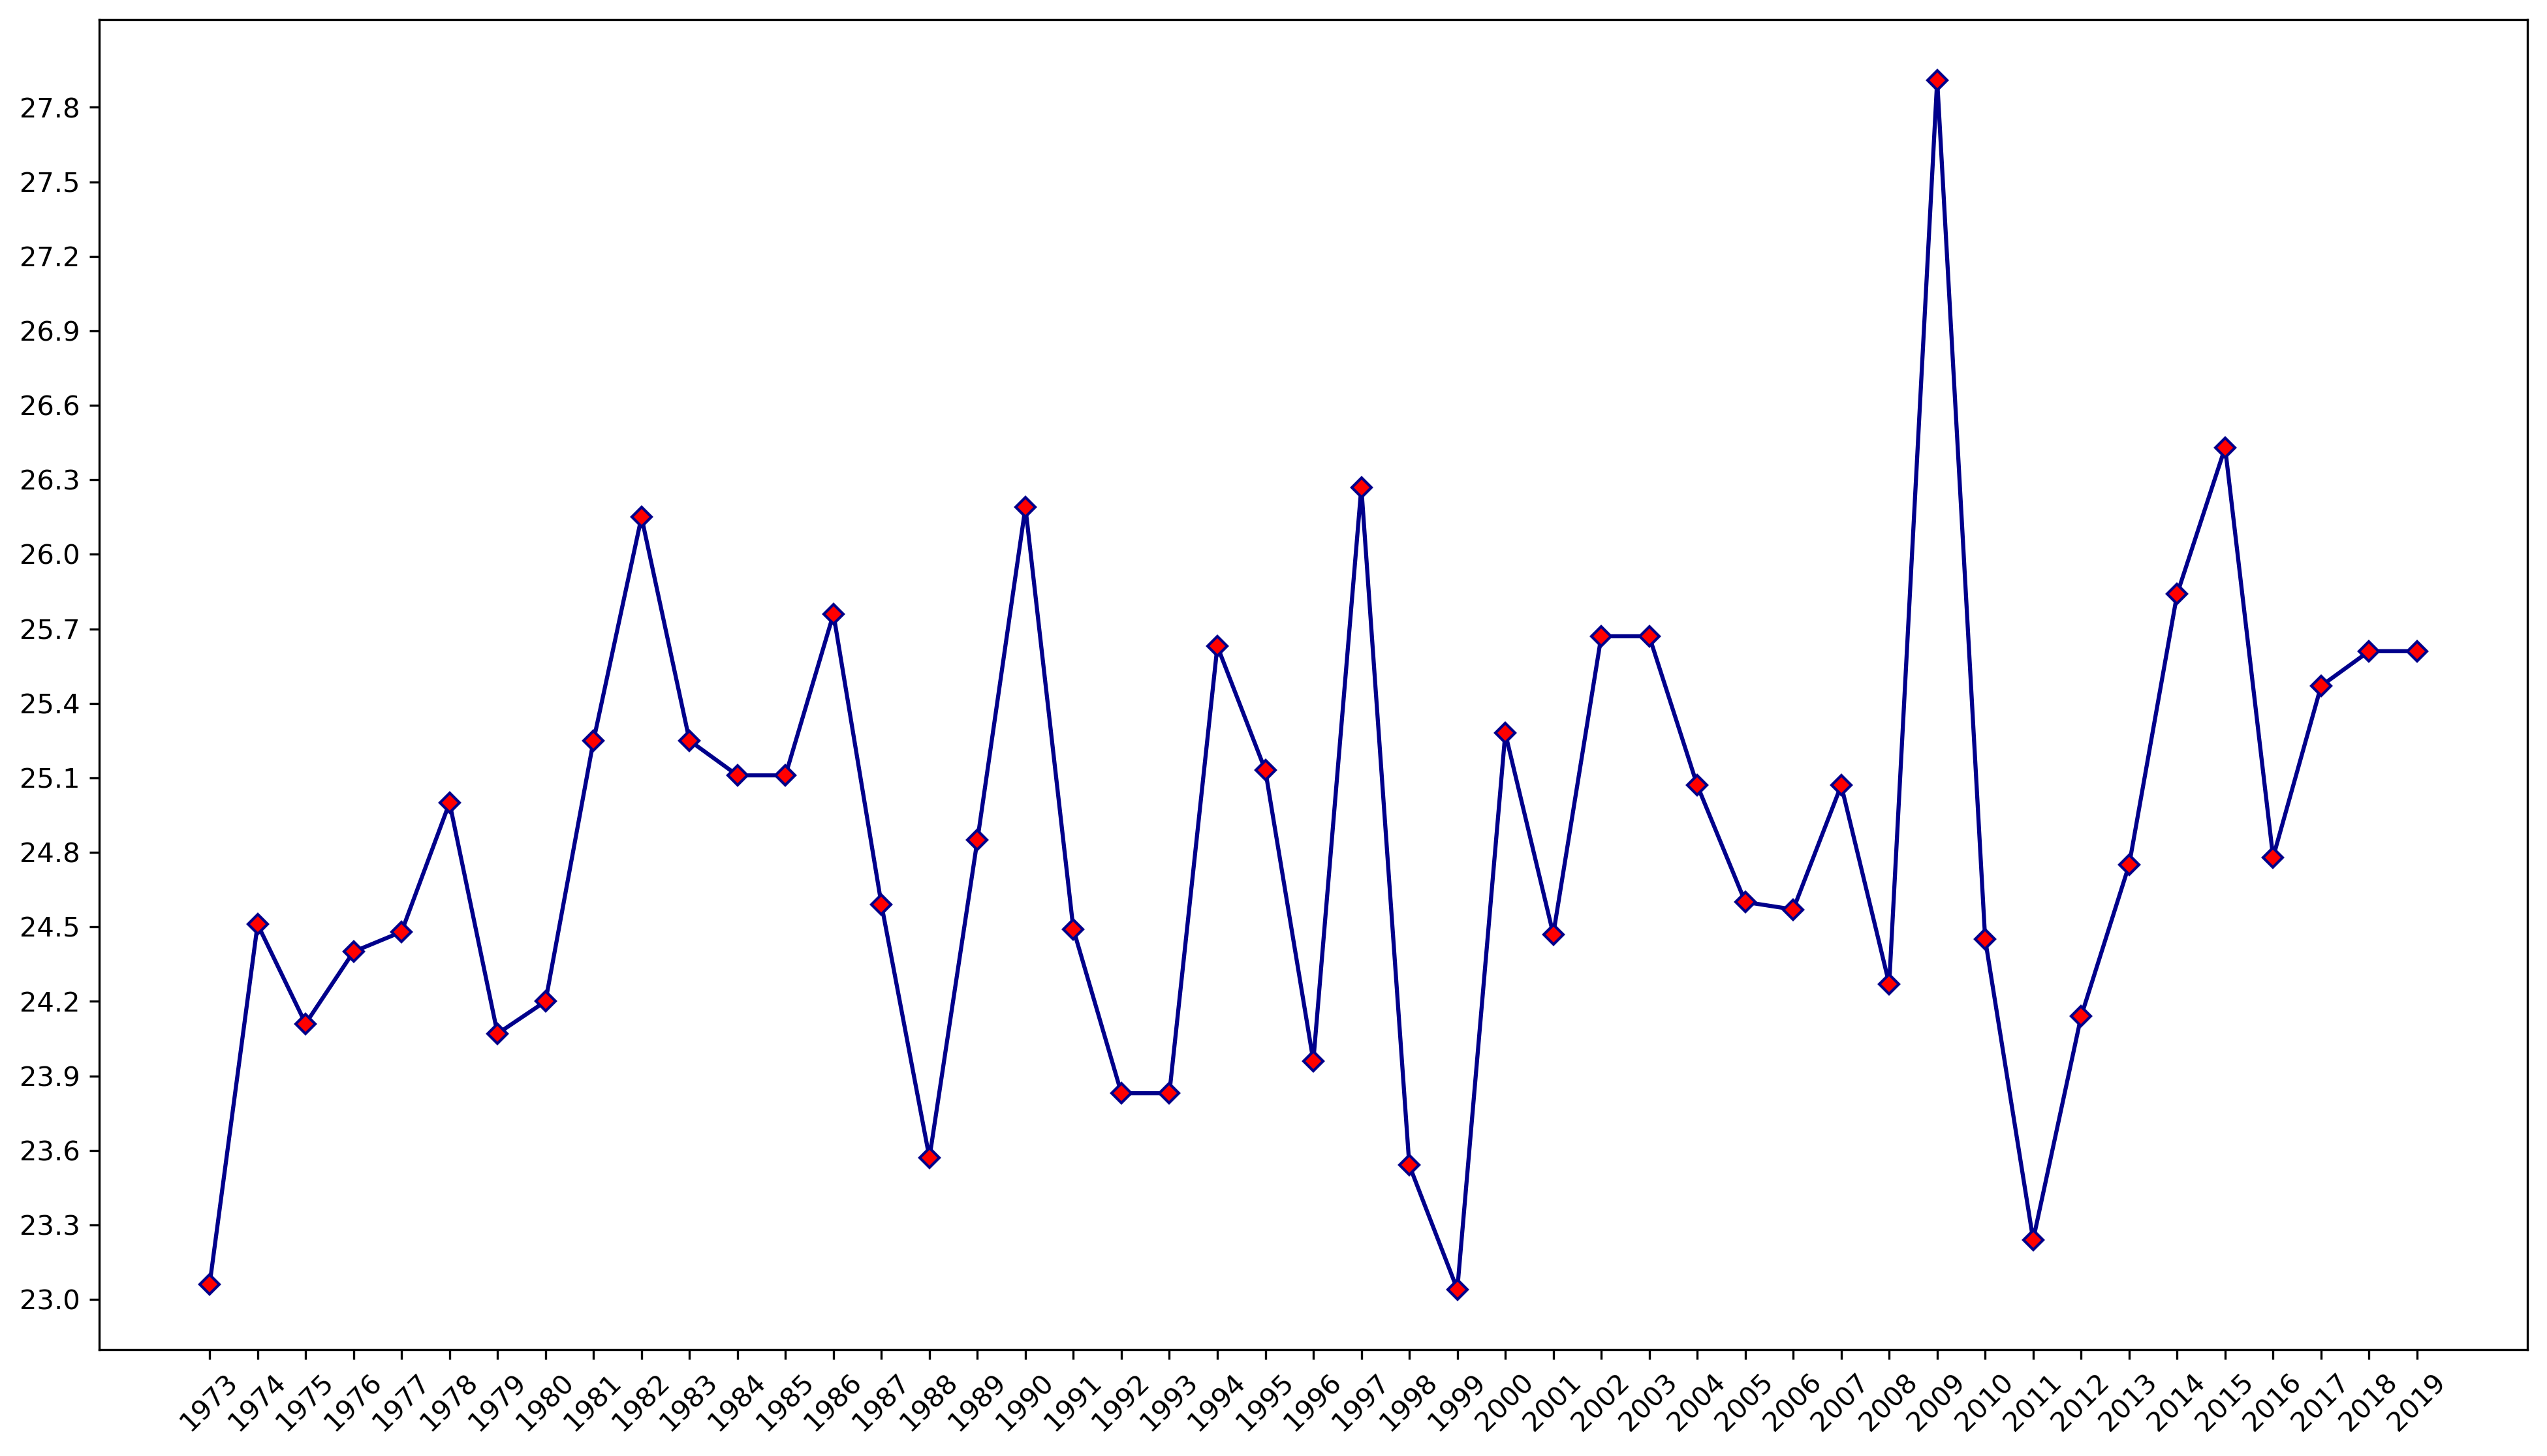

In [21]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels(xticks, rotation = 45);

Добавим сетку (*grid*), которая будет облегчать поиск координат точек.

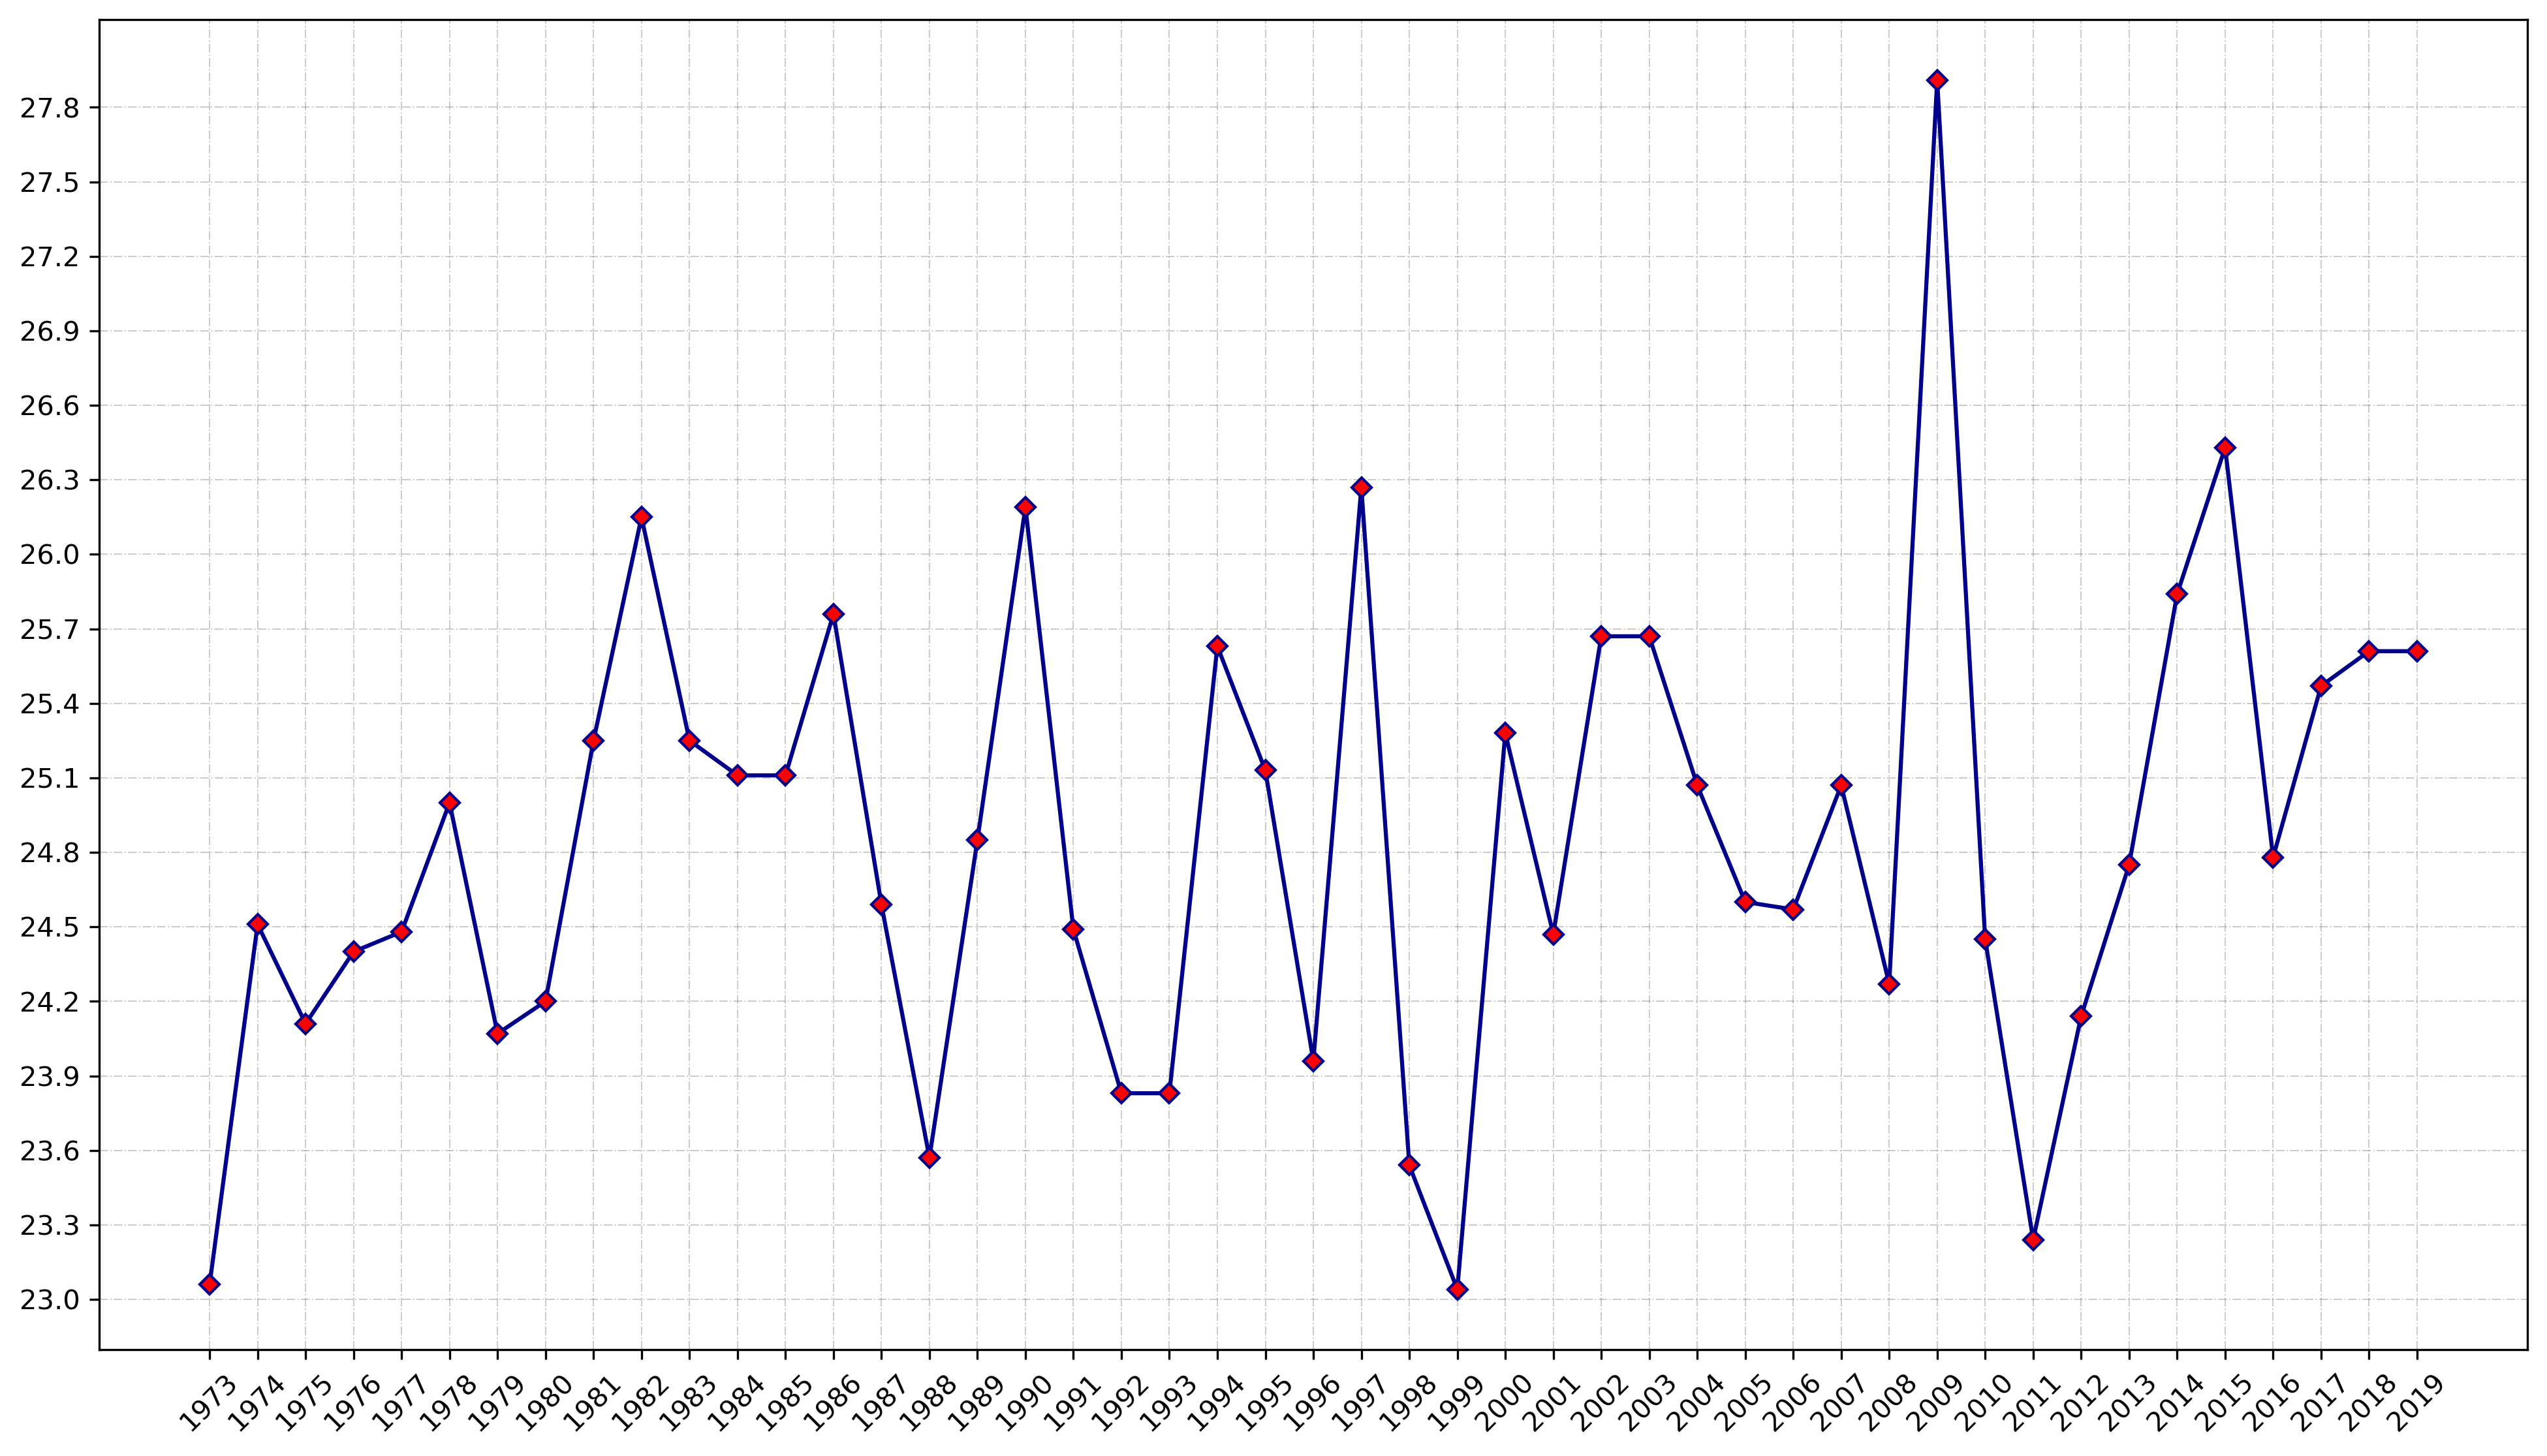

In [22]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45)

# отправляет сетку на задний план,
# чтобы не перечеркивала график

ax.set_axisbelow(True)

# color – цвет сетки
# linestyle – тип линии
# linewidth – толщина линии
# alpha – прозрачность

ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

Что не очень хорошо в этом графике? Поля слева и справа, которые образовались из-за несоответствия сетки и масштаба графика. Давайте зафиксируем границы по оси X и по оси Y, довольно полезный навык, пригодится для разных графиков. Для этого воспользуемся методами с довольно логичными названиями `.set_xlim()` и `.set_ylim()`:

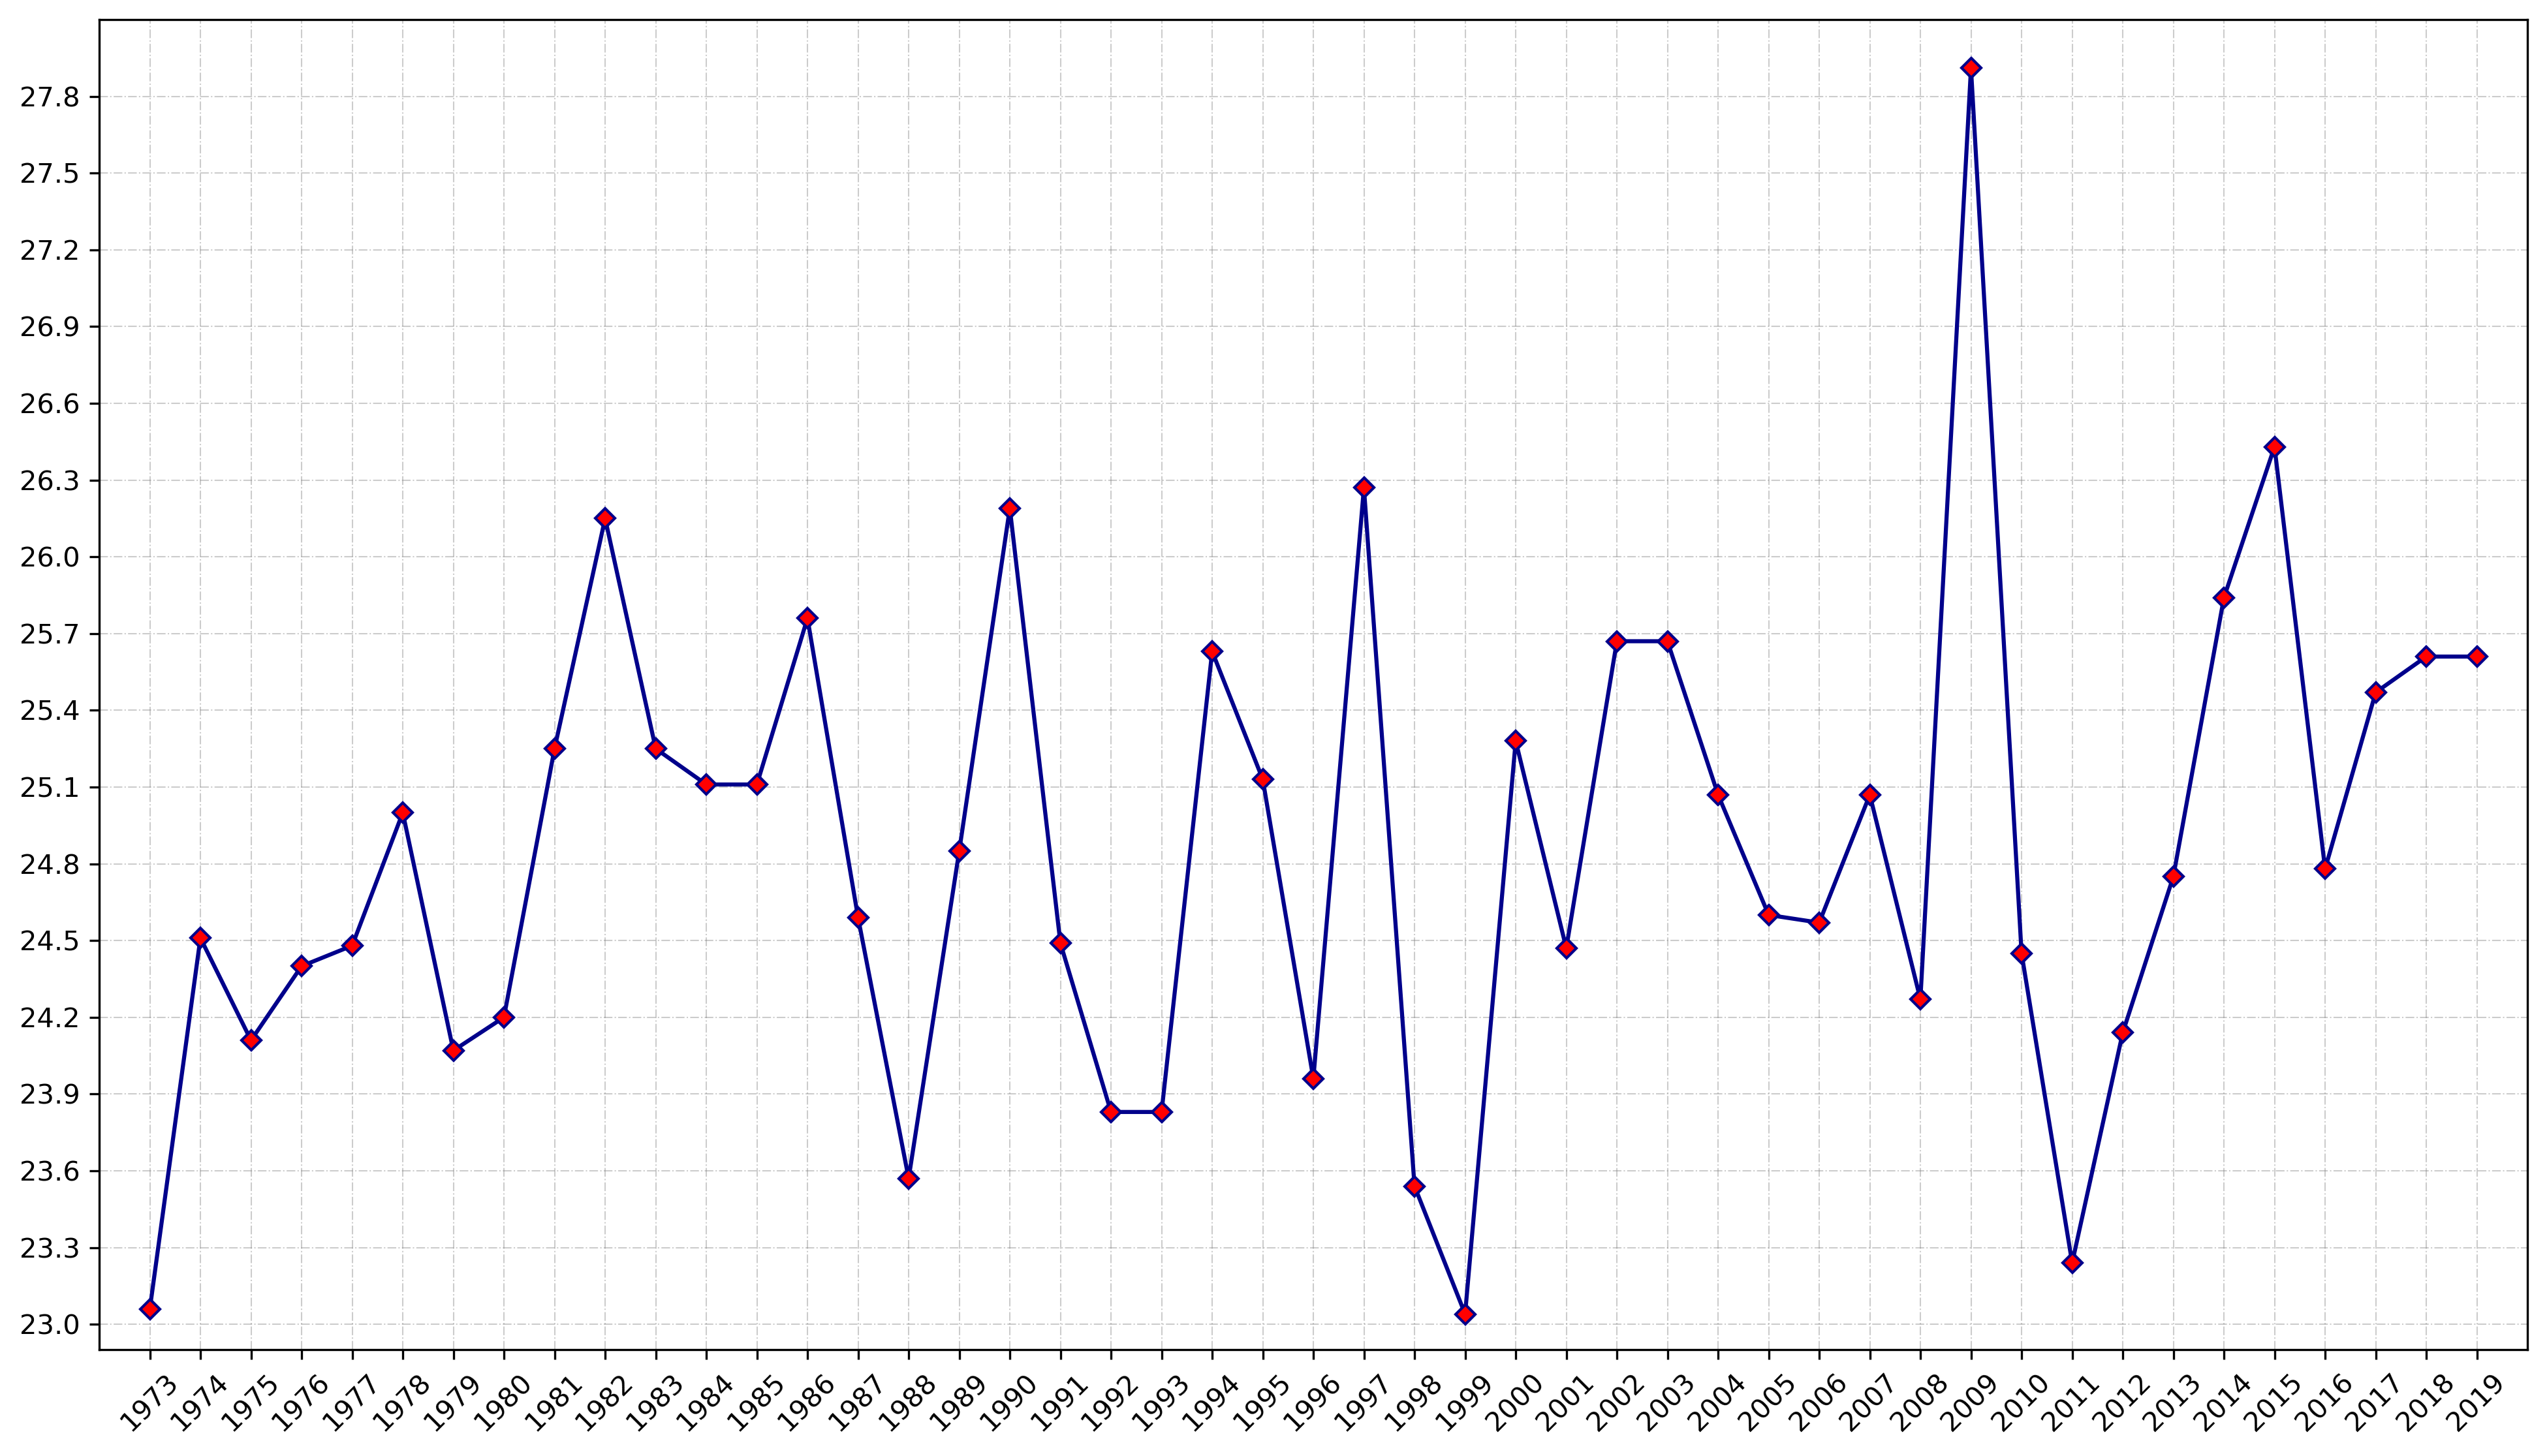

In [23]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45)

# левая и правая граница
# нижняя и верхняя граница

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

Отлично! Добавим названия самих осей, а также заголовок графика:

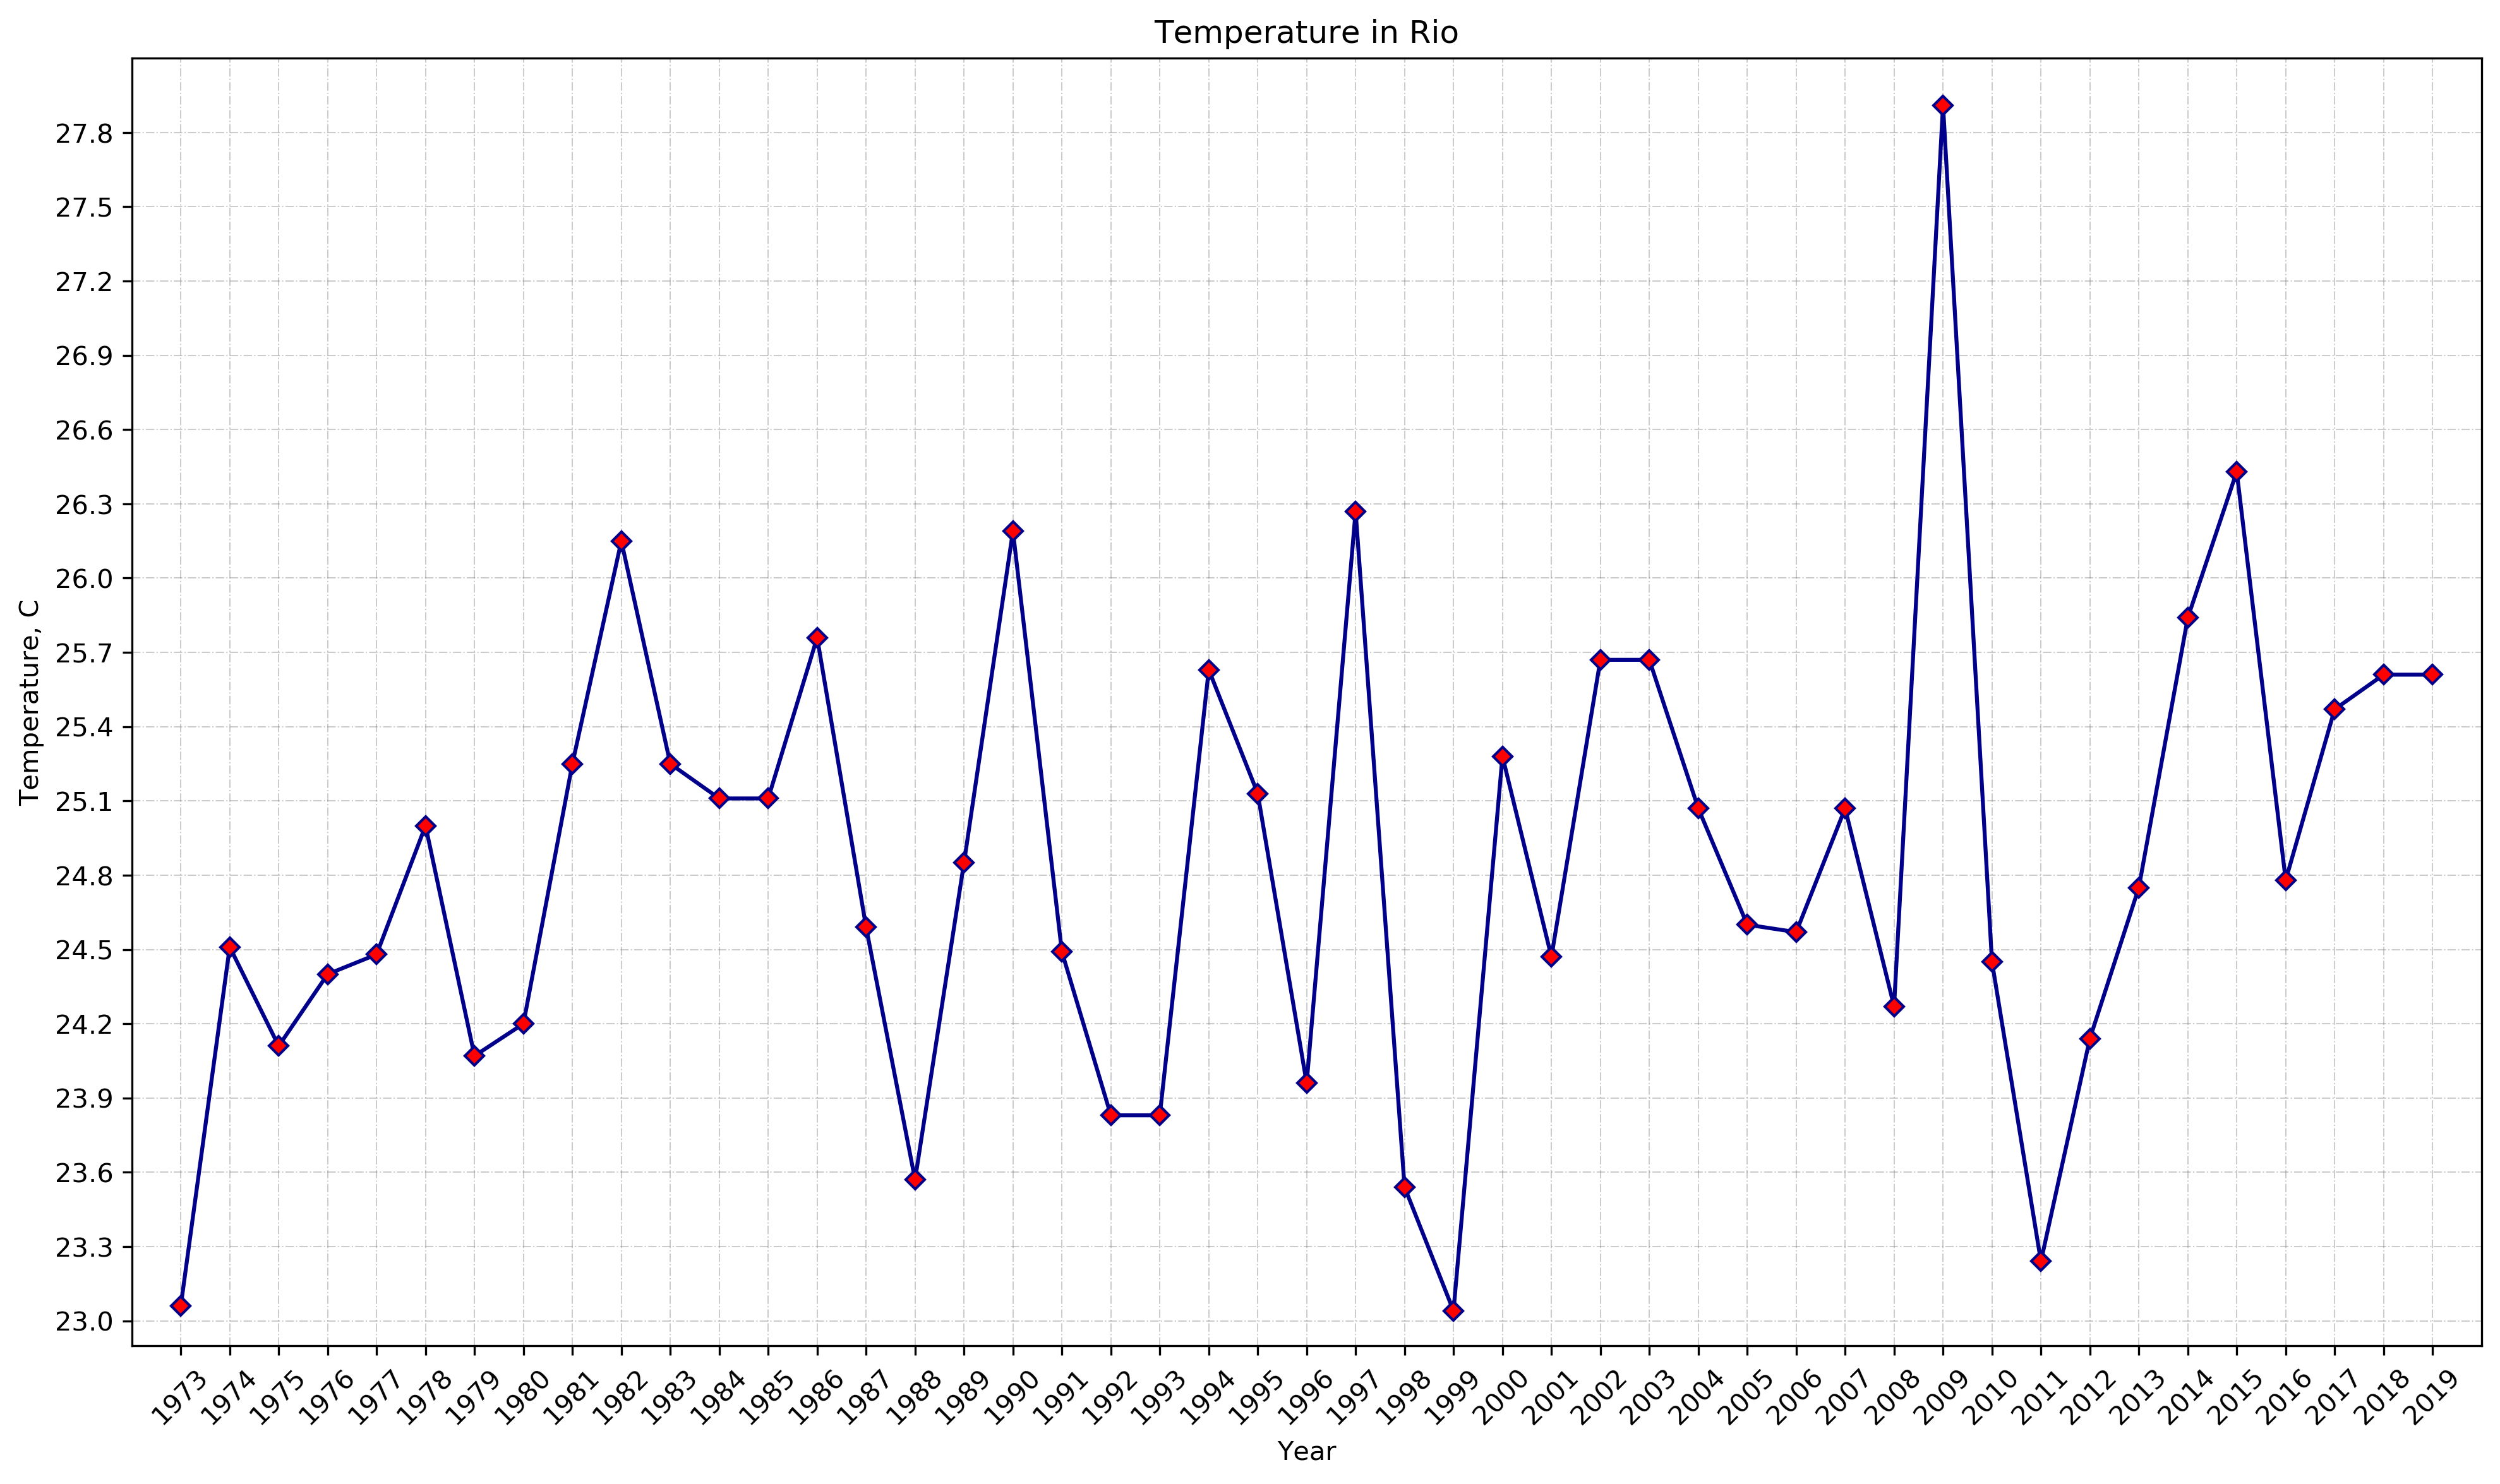

In [24]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45)

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

# тут все просто: xlabel, ylabel и title

ax.set_xlabel("Year")
ax.set_ylabel("Temperature, C")
ax.set_title("Temperature in Rio")


ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

График получился довольно большой, и шрифт подписей, используемый по умолчанию, кажется слишком мелким. Давайте это скорректируем. За настройки шрифта отвечает аргумент `fontdict`, который есть у функций и методов, которые добавляют текст на график. В нашем случае это `.xticklabels()`, `.set_xlabel()`, `.set_ylabel()`. Значение аргумента `fontdict` должно быть представлено в виде словаря, как выглядит исходный словарь с настройками по умолчанию, можно посмотреть в [документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html).

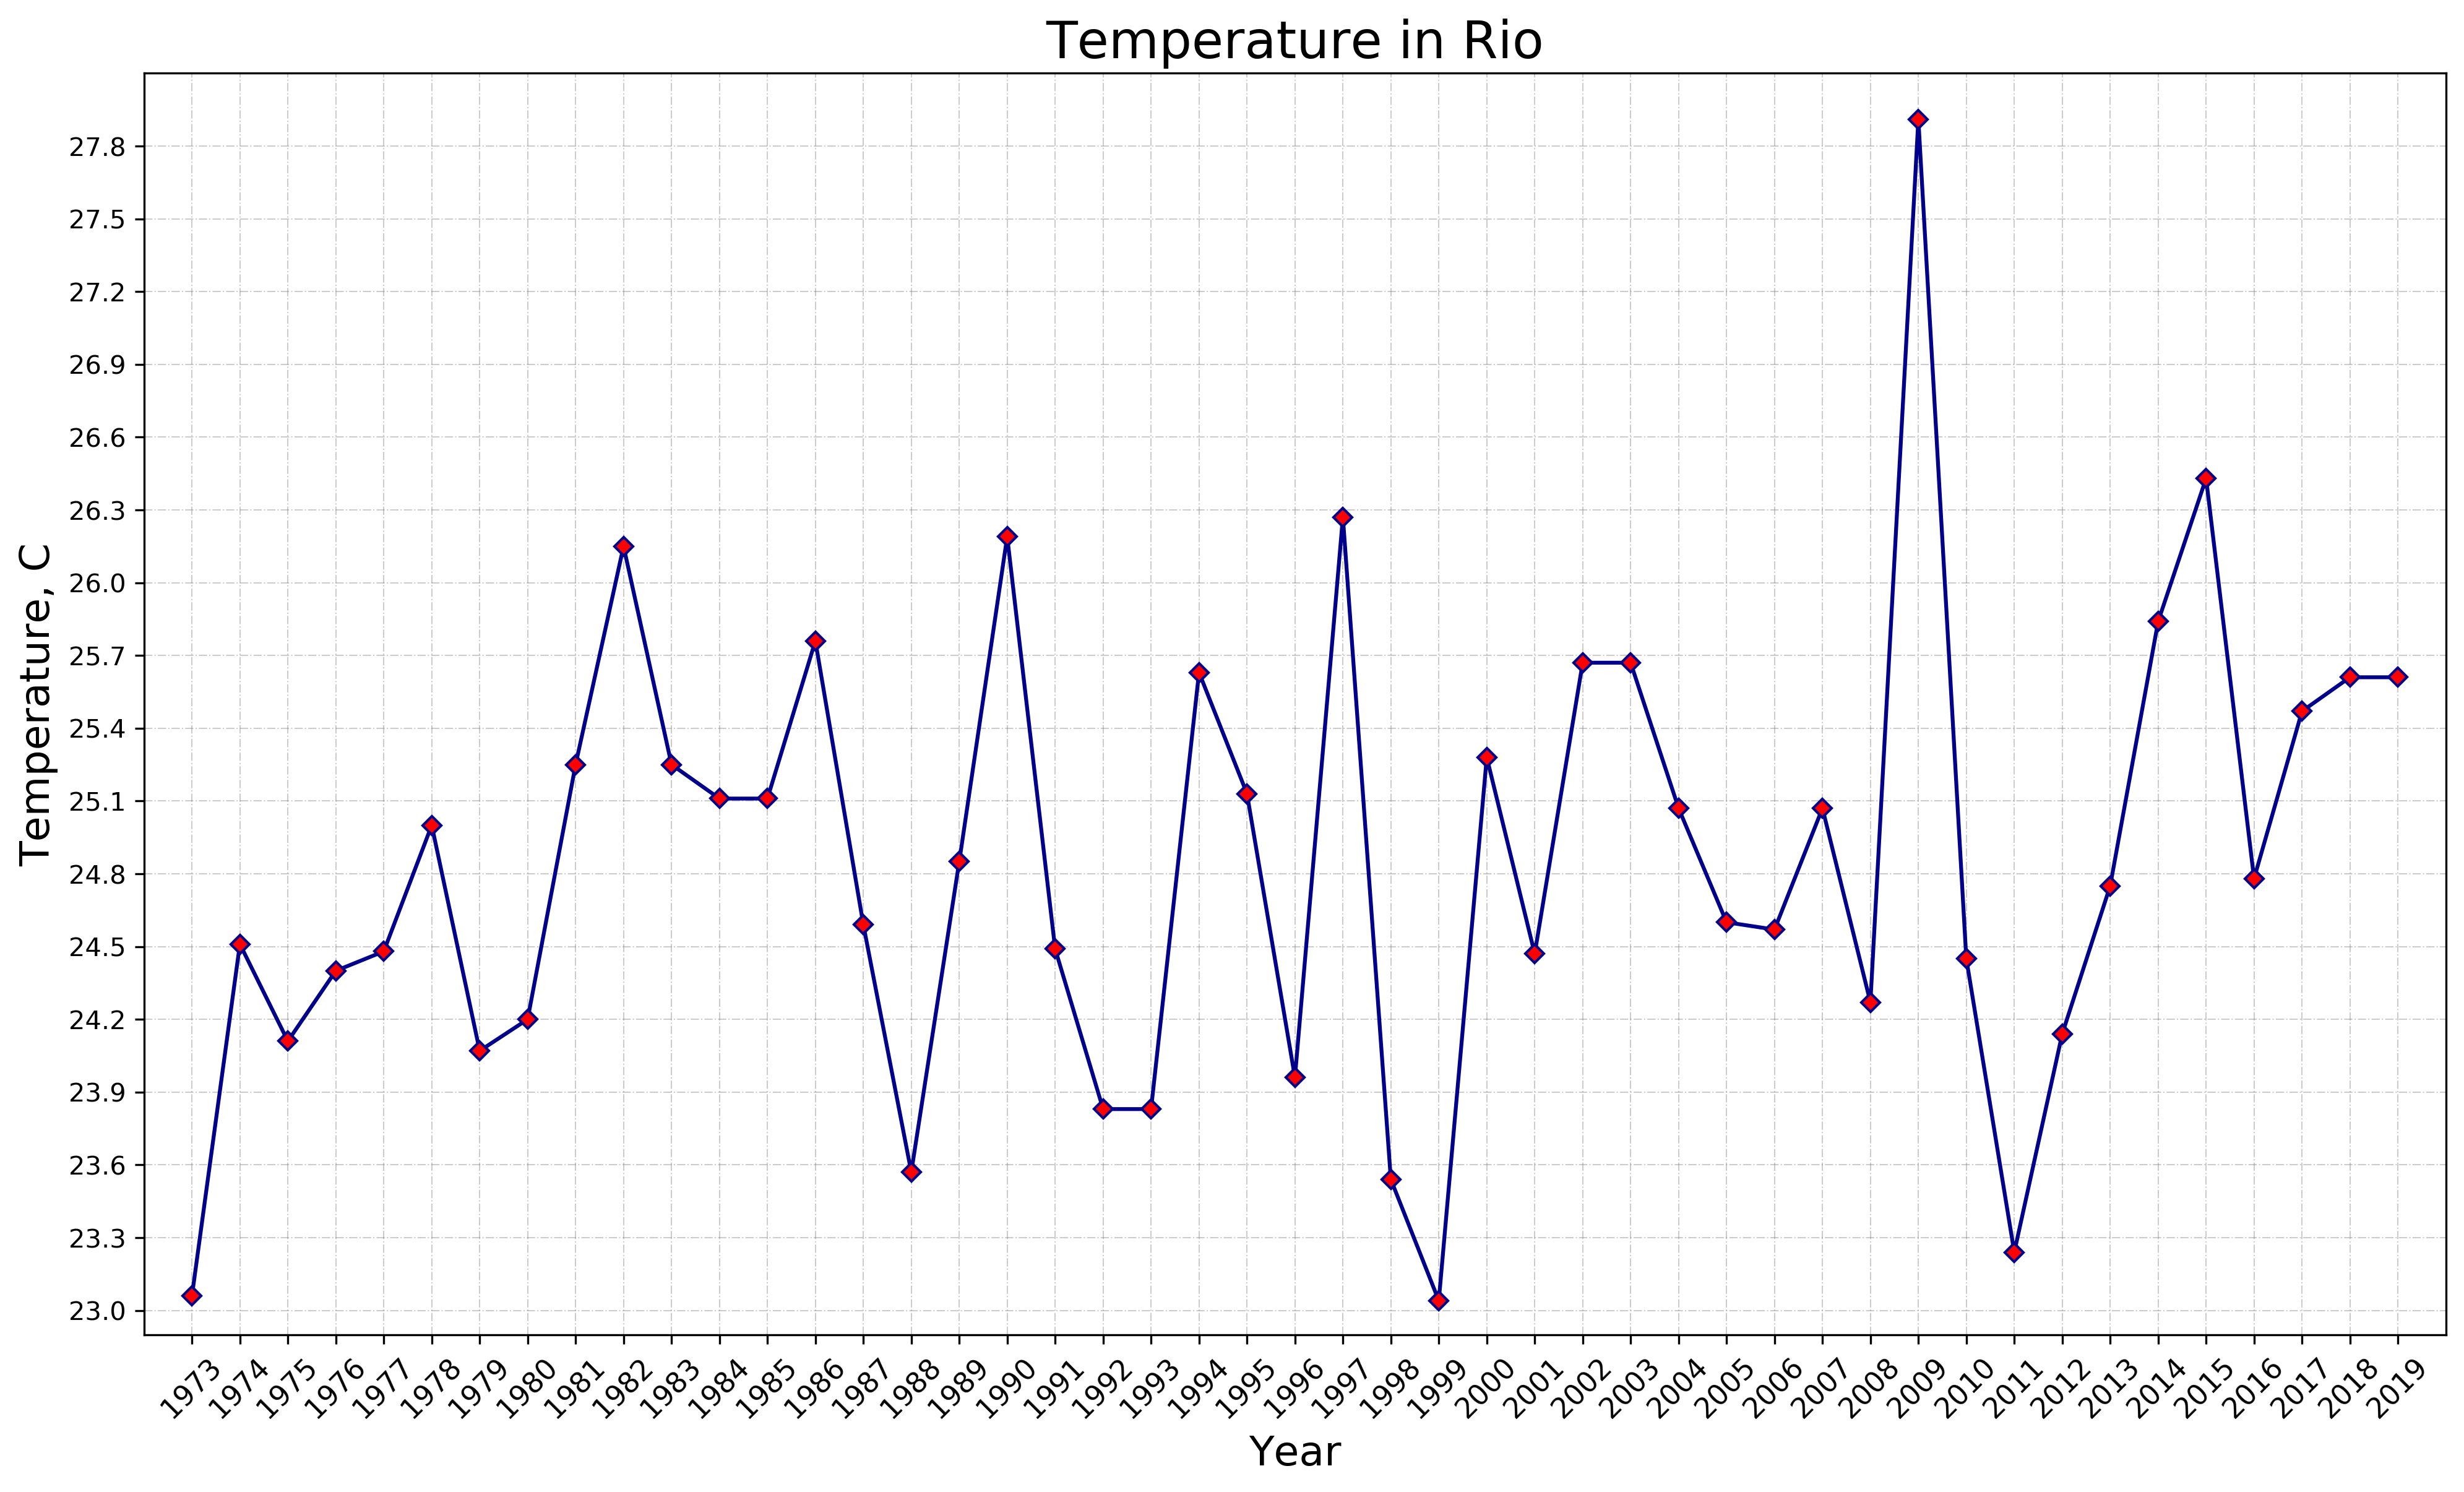

In [25]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

# значения лет - шрифт 11 пунктов

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

# названия осей - шрифт 16 пунктов
# заголовок графика - шрифт 20 пунктов

ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio", fontdict = {'fontsize': 20})

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

Давайте сделаем заголовок более информативным и стилизуем его еще немного – добавим выравнивание по левому краю, изменим начертание шрифта на полужирный и увеличим расстояние между ним и рамкой графика (*padding*, здесь `pad`):

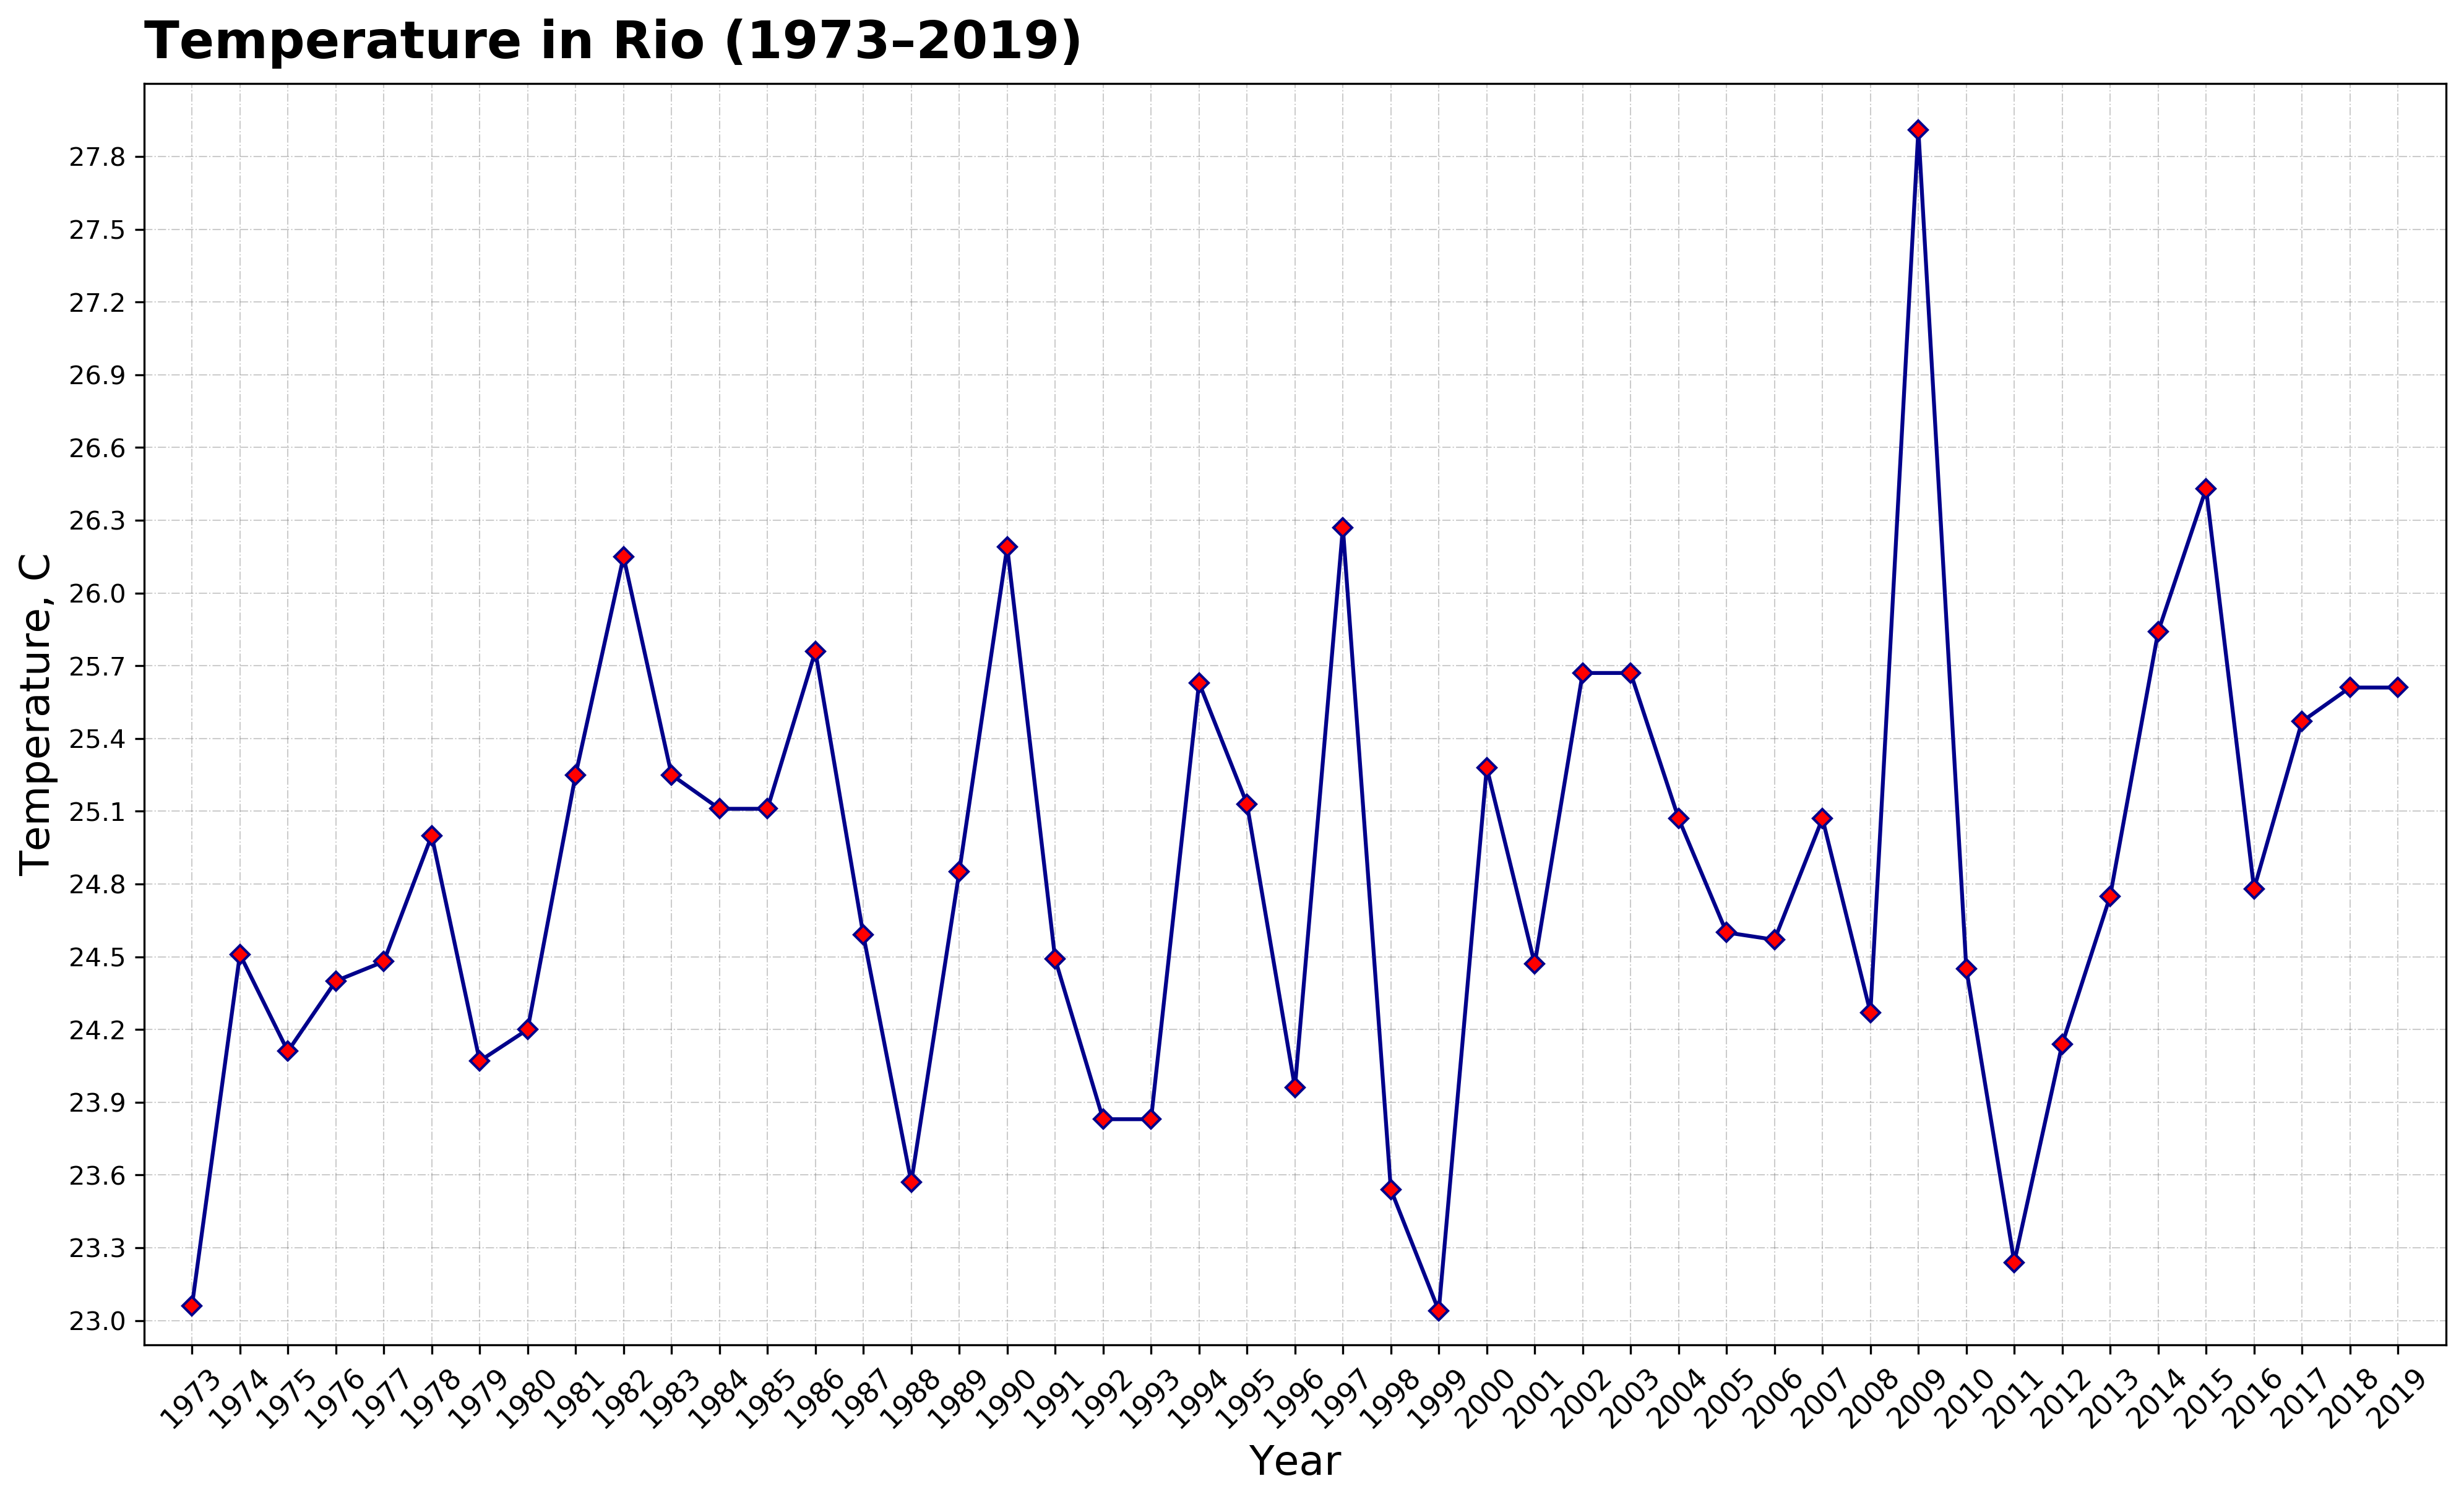

In [26]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio (1973–2019)", 
             loc = "left", 
             pad = 10,
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})


ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

На этом остановимся и выгрузим график в файл. Для этого нам нужно вспомнить про объект `fig`, который отвечает за саму картинку, и применить к нему метод `.savefig()`:

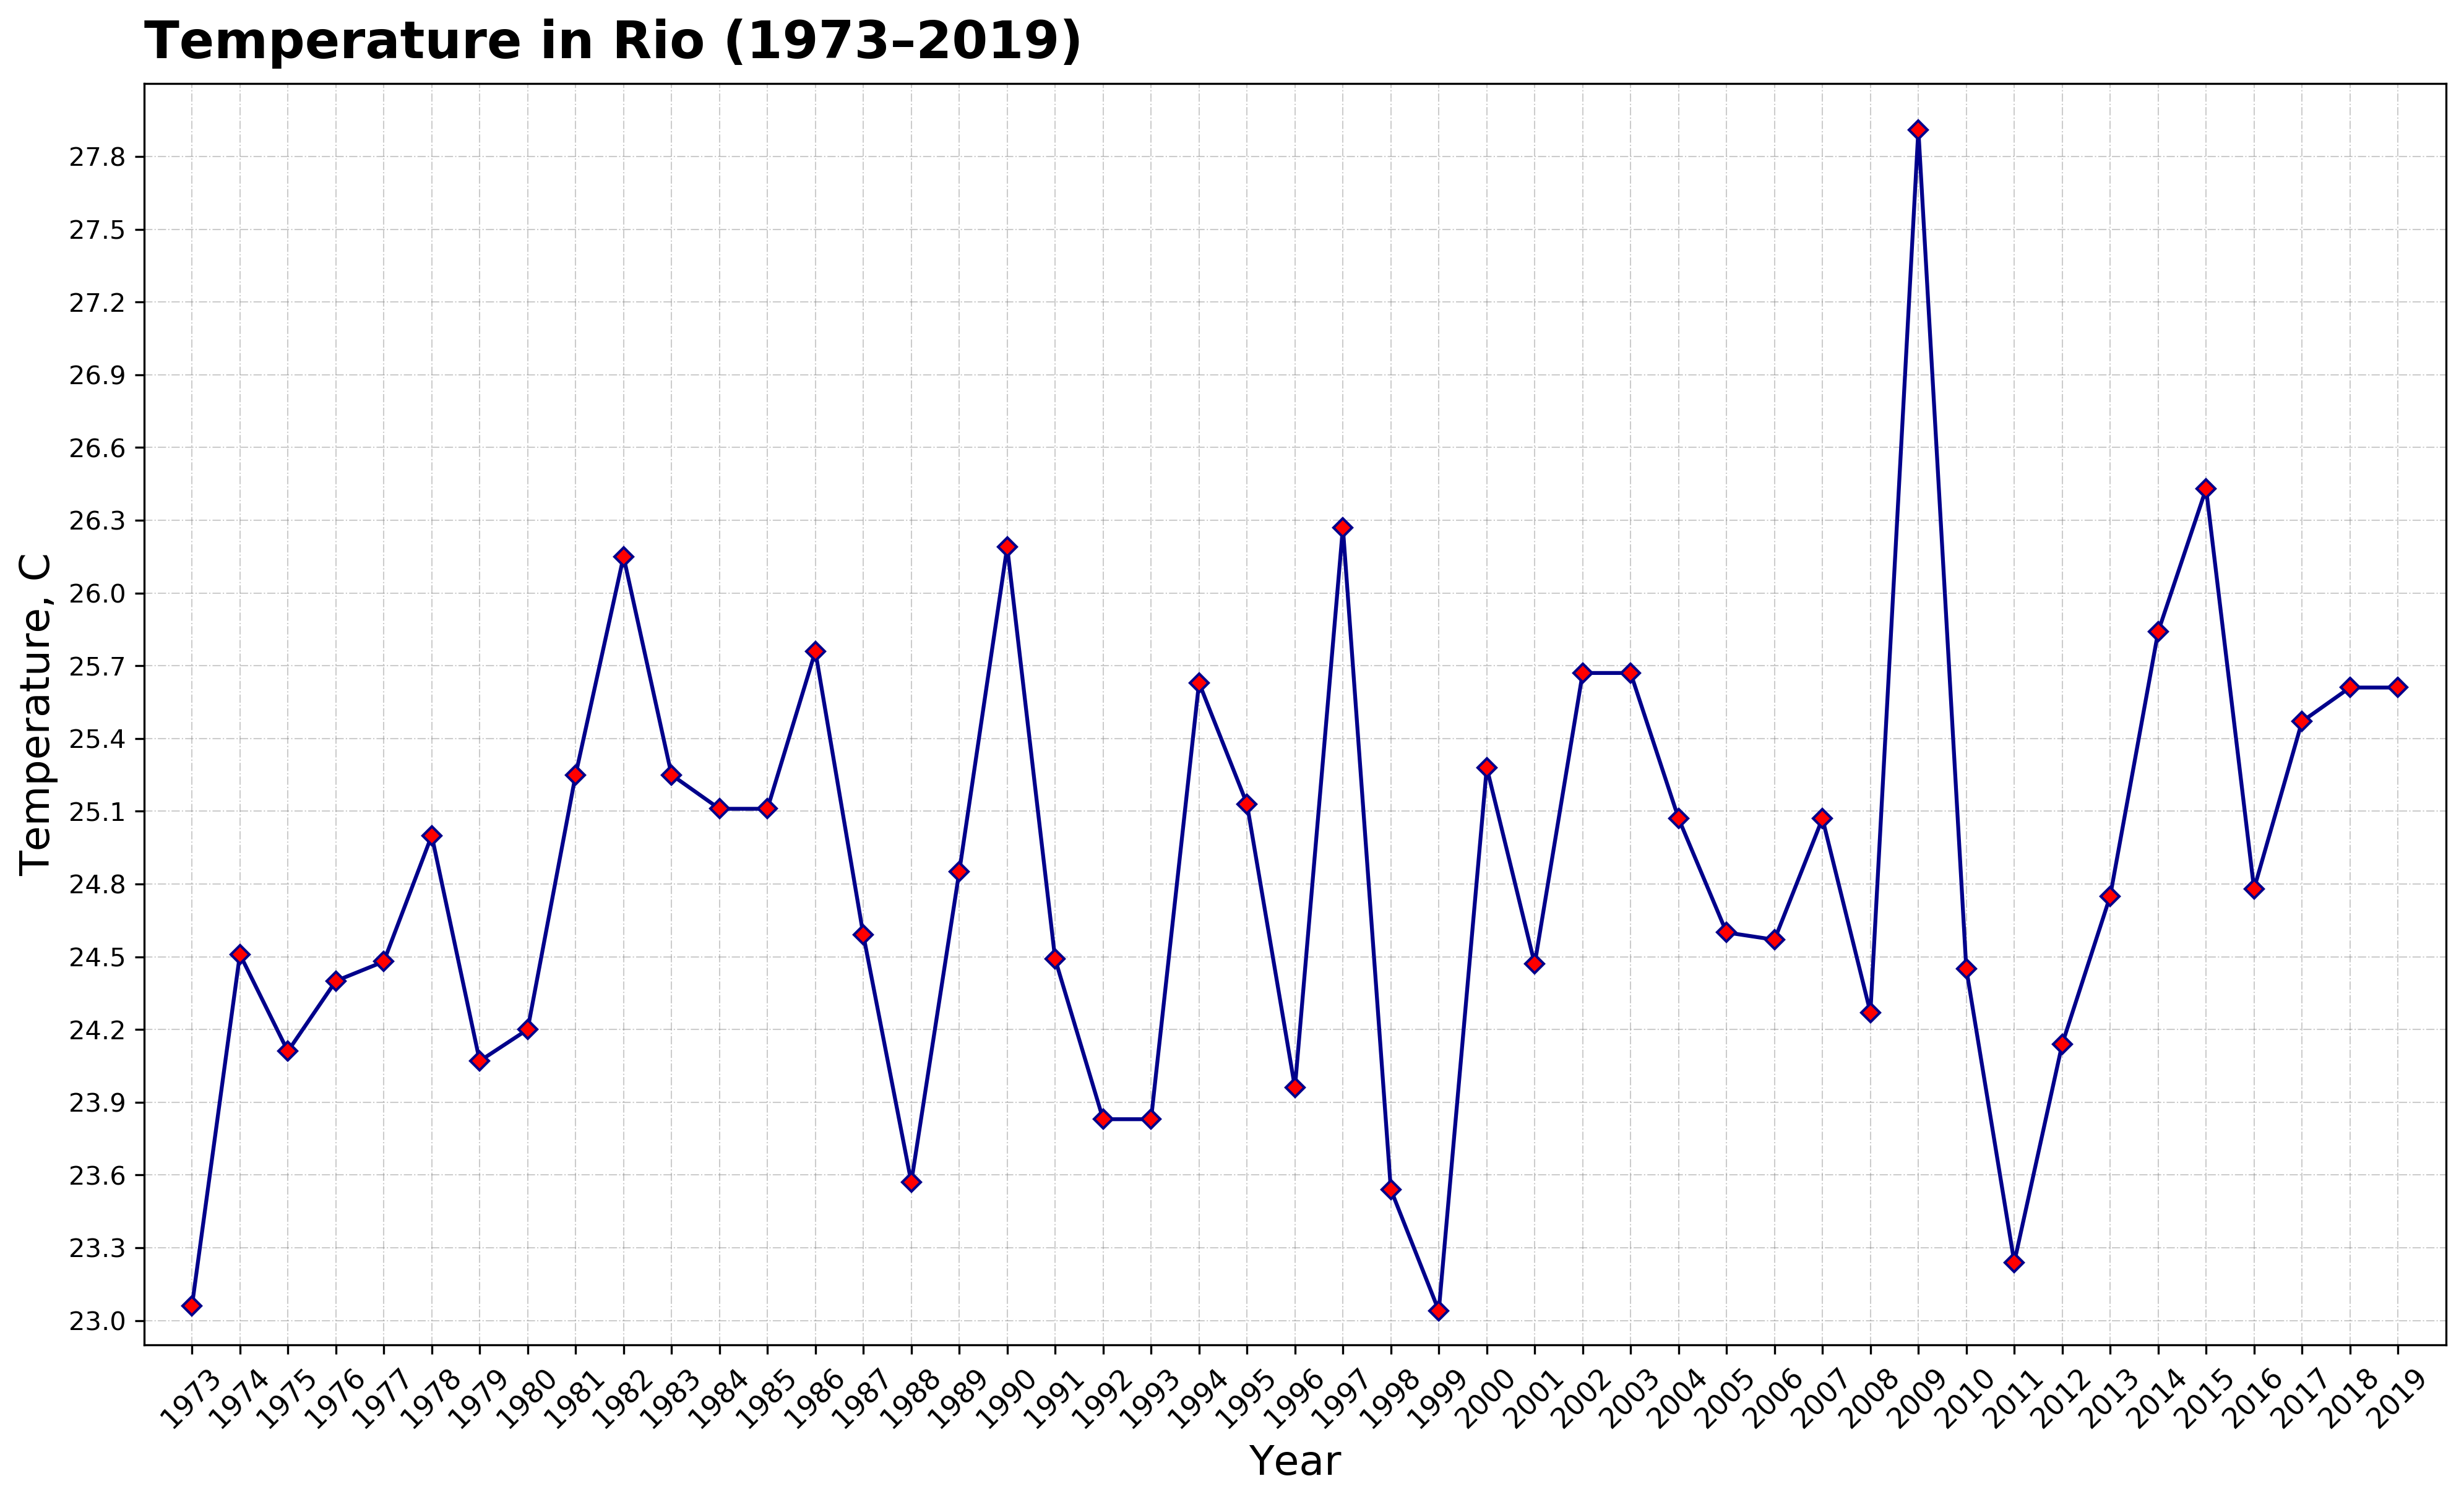

In [27]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 
ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio (1973–2019)", 
             loc = "left", 
             pad = 10,
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})


ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

fig.savefig("Temperature.png")

### Более продвинутая задача 1: отмечаем цветом минимум и максимум

Допустим, мы хотим усовершествовать график – выделить минимум и максимум другим цветом. Для начала определим, в каких годах достигался минимум и максимум температуры воздуха:

In [28]:
df["NOV"].min()

23.04

In [29]:
df["NOV"].max()

27.91

In [30]:
df[df["NOV"] == df["NOV"].min()]  # выбираем нужные строки

YEAR    JAN    FEB   MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
26  1999  27.83  27.96  27.0  24.69  22.21  21.25  21.56  20.94  22.77  21.62   

      NOV   DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
26  23.04  25.7  27.55  24.63  21.25  22.48   23.98

In [31]:
df[df["NOV"] == df["NOV"].max()] # выбираем нужные строки

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
36  2009  26.32  27.96  26.55  24.21  23.16  20.71  21.21  21.88  24.01   

      OCT    NOV   DEC  D-J-F  M-A-M  J-J-A  S-O-N  metANN  
36  24.07  27.91  26.2  26.56  24.64  21.27  25.33   24.45

Итак, мы получили важную информацию – координаты точек, которые мы хотим выделить: 

* (1999, 23.04);
* (2009, 27.91).

Так как `plot()` не позволяет выставлять разные цвета точек в рамках одного графика, мы пойдем на хитрость и построим два графика: один обычный – с синей линией и синими точками, второй – просто с двумя красными точками для минимума и максимума и «выключенной» линией. Для этого мы два раза применим метод `.plot()`, это позволит осуществить наложение графиков один на другой (порядок имеет значение).

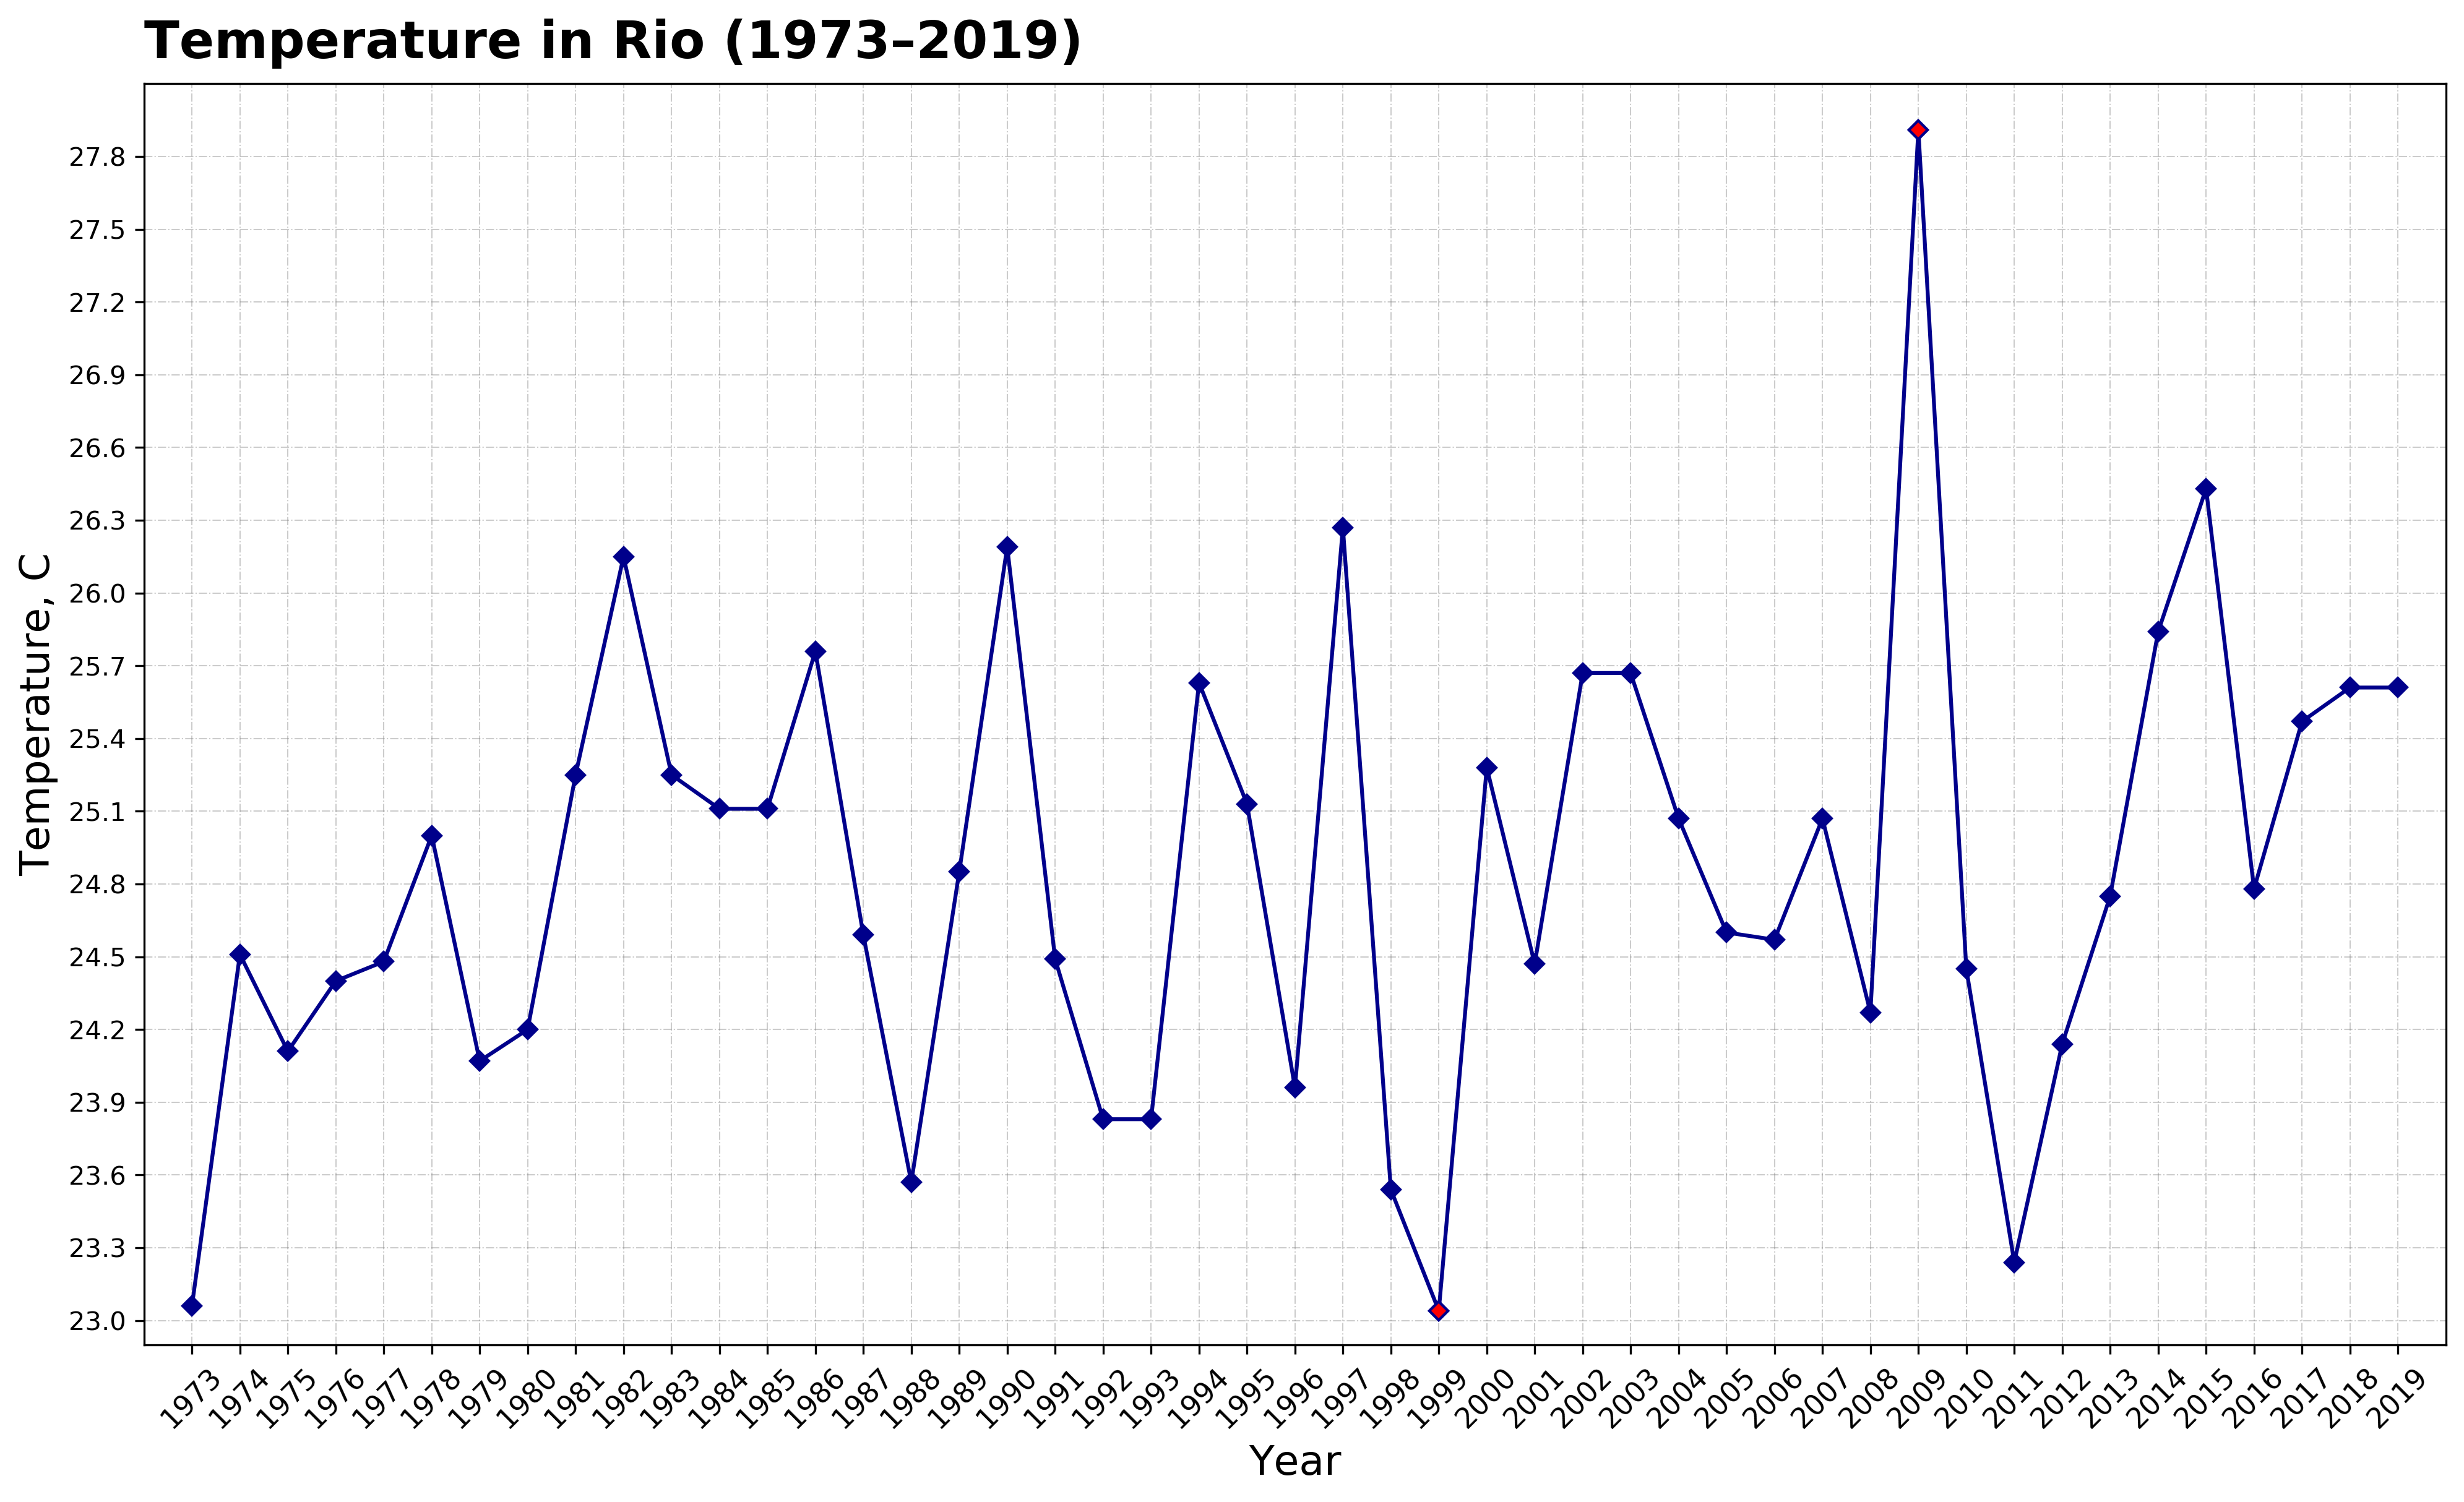

In [32]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 300) 


# первый график: все точки из данных, синяя линия, синие точки

ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "darkblue", markeredgecolor = "darkblue")

# второй график: красные точки с координатами (1999, 23.04) и (2009, 27.91)
# «пустая» линия благодаря linestyle = "" 

ax.plot([1999, 2009], [23.04, 27.91], linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})


ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio (1973–2019)", 
             loc = "left", 
             pad = 10,
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

Чтобы при знакомстве с графиком было понятно, что именно мы выделили цветом, добавим текст рядом с точками, соответствующим минимальному и максимальному значению. Для этого нам пригодится метод `.text()`. Он принимает на вход координаты места, в котором нужно расположить текст, само сообщение с текстом и дополнительные настройки вроде цвета или размера шрифта:

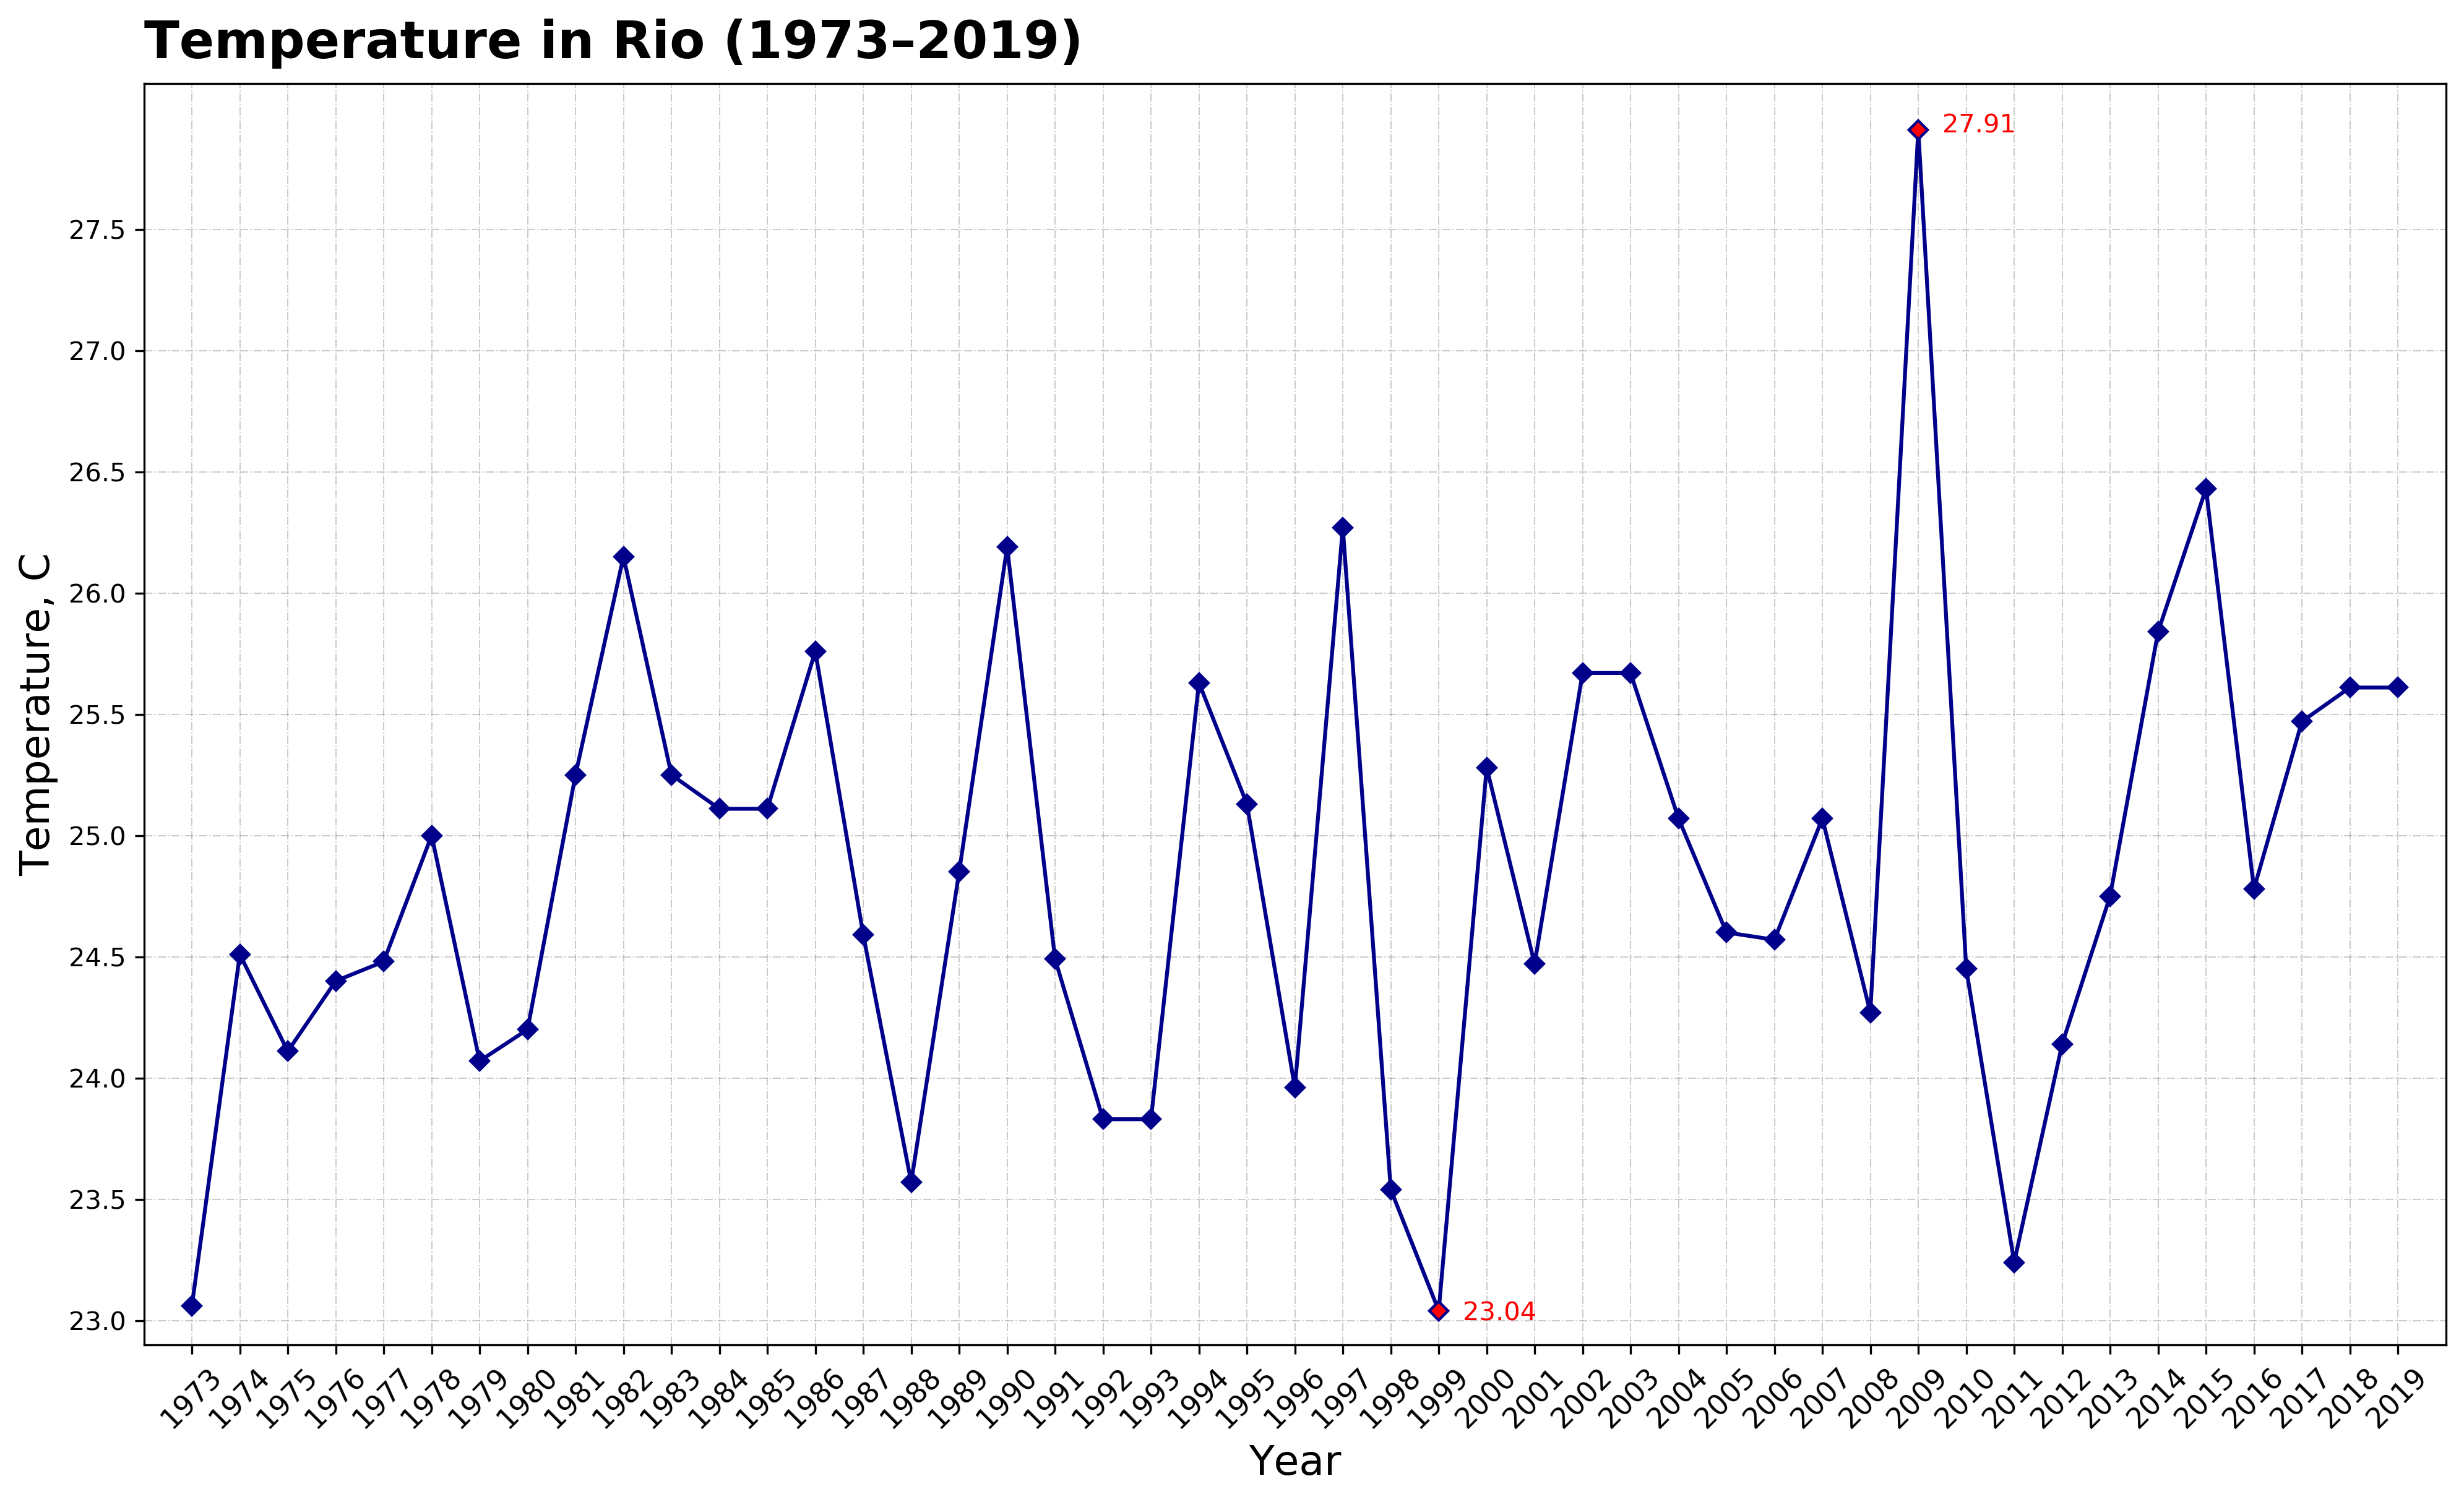

In [33]:
xticks = range(1973, 2020)
yticks = np.arange(23, 28, 0.5)

fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 

ax.plot(df["YEAR"], df["NOV"], color = "darkblue", 
        marker = "D", markersize = 5, markerfacecolor = "darkblue", markeredgecolor = "darkblue")

ax.plot([1999, 2009], [23.04, 27.91], linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})


ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio (1973–2019)", 
             loc = "left", 
             pad = 10,
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})

# координаты для текста по оси X и Y, сам текст и его цвет

ax.text(1999.5, 23, "23.04", color = "red")
ax.text(2009.5, 27.9, "27.91", color = "red")

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

### Более продвинутая задача 2: отмечаем пропуски и добавляем легенду

Теперь давайте сделаем график более корректным – покажем, что в данных есть пропуски. Это те отрезки на графике, где динамики температуры не наблюдается. 

Идея: последовательно построить четыре графика в одних и тех же осях: 

* график по всем годам, просто синяя линия, без точек;
* график только для тех лет, по которым были данные, синие ромбики, без линии;
* график только для тех лет, по которым не было данных, синие крестики, тоже без линии;
* график с двумя красными ромбиками для минимума и максимума.


С первым и последним графиками все понятно. Для построения второго графика отберем в датафрейм `good` те строки, где год не входит в список лет с пропусками. Для быстрого и компактного решения воспользуемся методом `.isin()` – он проверяет, входят ли значения в ячейках в некоторый список, а затем добавим к нему отрицание через оператор `~`:

In [34]:
good = df[~df["YEAR"].isin([1985, 1993, 2003, 2019])]

Для построения третьего графика выясним, какие координаты должны быть по оси Y у синих крестиков:

In [35]:
df[df["YEAR"] == 1985]["NOV"]

12    25.11
Name: NOV, dtype: float64

In [36]:
df[df["YEAR"] == 1993]["NOV"]

20    23.83
Name: NOV, dtype: float64

In [37]:
df[df["YEAR"] == 2003]["NOV"]

30    25.67
Name: NOV, dtype: float64

In [38]:
df[df["YEAR"] == 2019]["NOV"]

46    25.61
Name: NOV, dtype: float64

Координаты выяснили, теперь перейдем к построению всех четырех графиков.

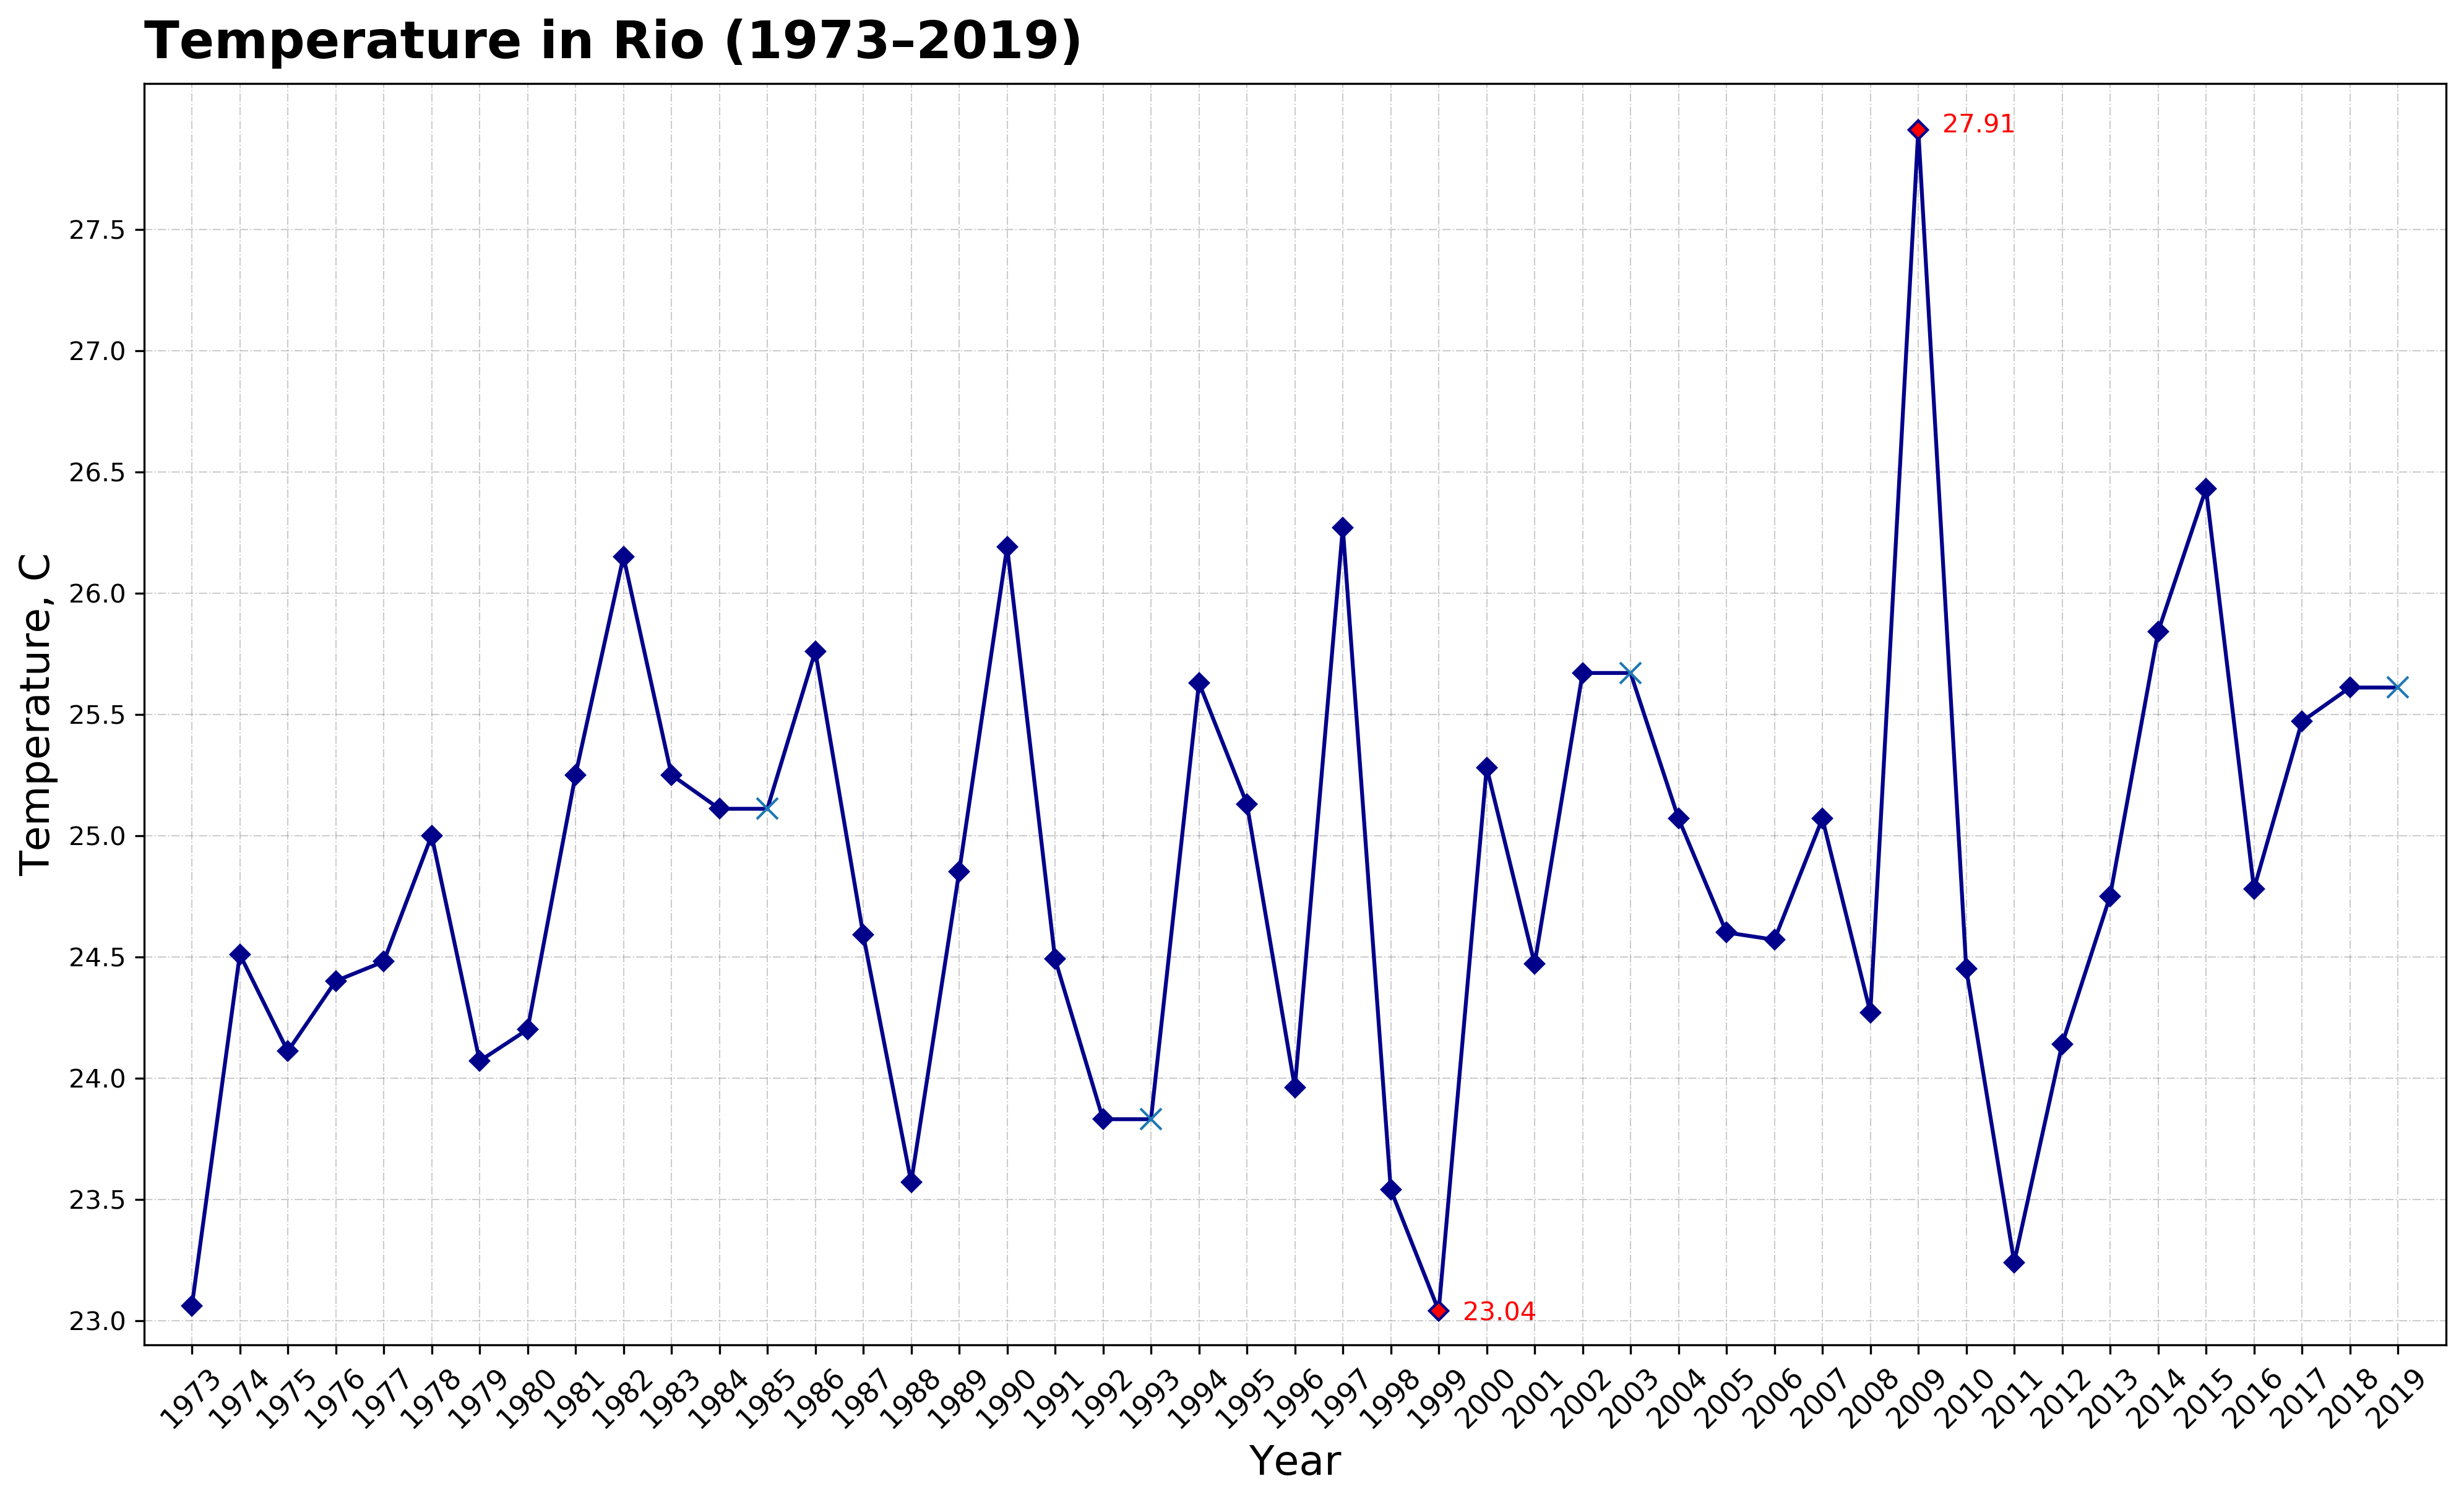

In [39]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 

# просто линия без точек
ax.plot(df["YEAR"], df["NOV"], color = "darkblue")

# синие ромбики для «хороших» лет без пропусков
ax.plot(good["YEAR"], good["NOV"], color = "darkblue", linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "darkblue")

# синие крестики для конкретных лет с пропусками
ax.plot([1985, 1993, 2003, 2019], [25.11, 23.83, 25.67, 25.61], linestyle = "",
        marker = "x", markersize = 8, markerfacecolor = "darkblue")

# красные точки для минимума и максимума
ax.plot([1999, 2009], [23.04, 27.91], linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue")

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})


ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio (1973–2019)", 
             loc = "left", 
             pad = 10,
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})

ax.text(1999.5, 23, "23.04", color = "red")
ax.text(2009.5, 27.9, "27.91", color = "red")


ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

Добавим легенду, чтобы было понятно, что это за типы точек. Для этого в методе `.plot()` для «особых» графиков добавим аргумент `label`, это тот текст, который будет отображаться в легенде для расшифровки обозначений, а затем применим метод `.legend()`:

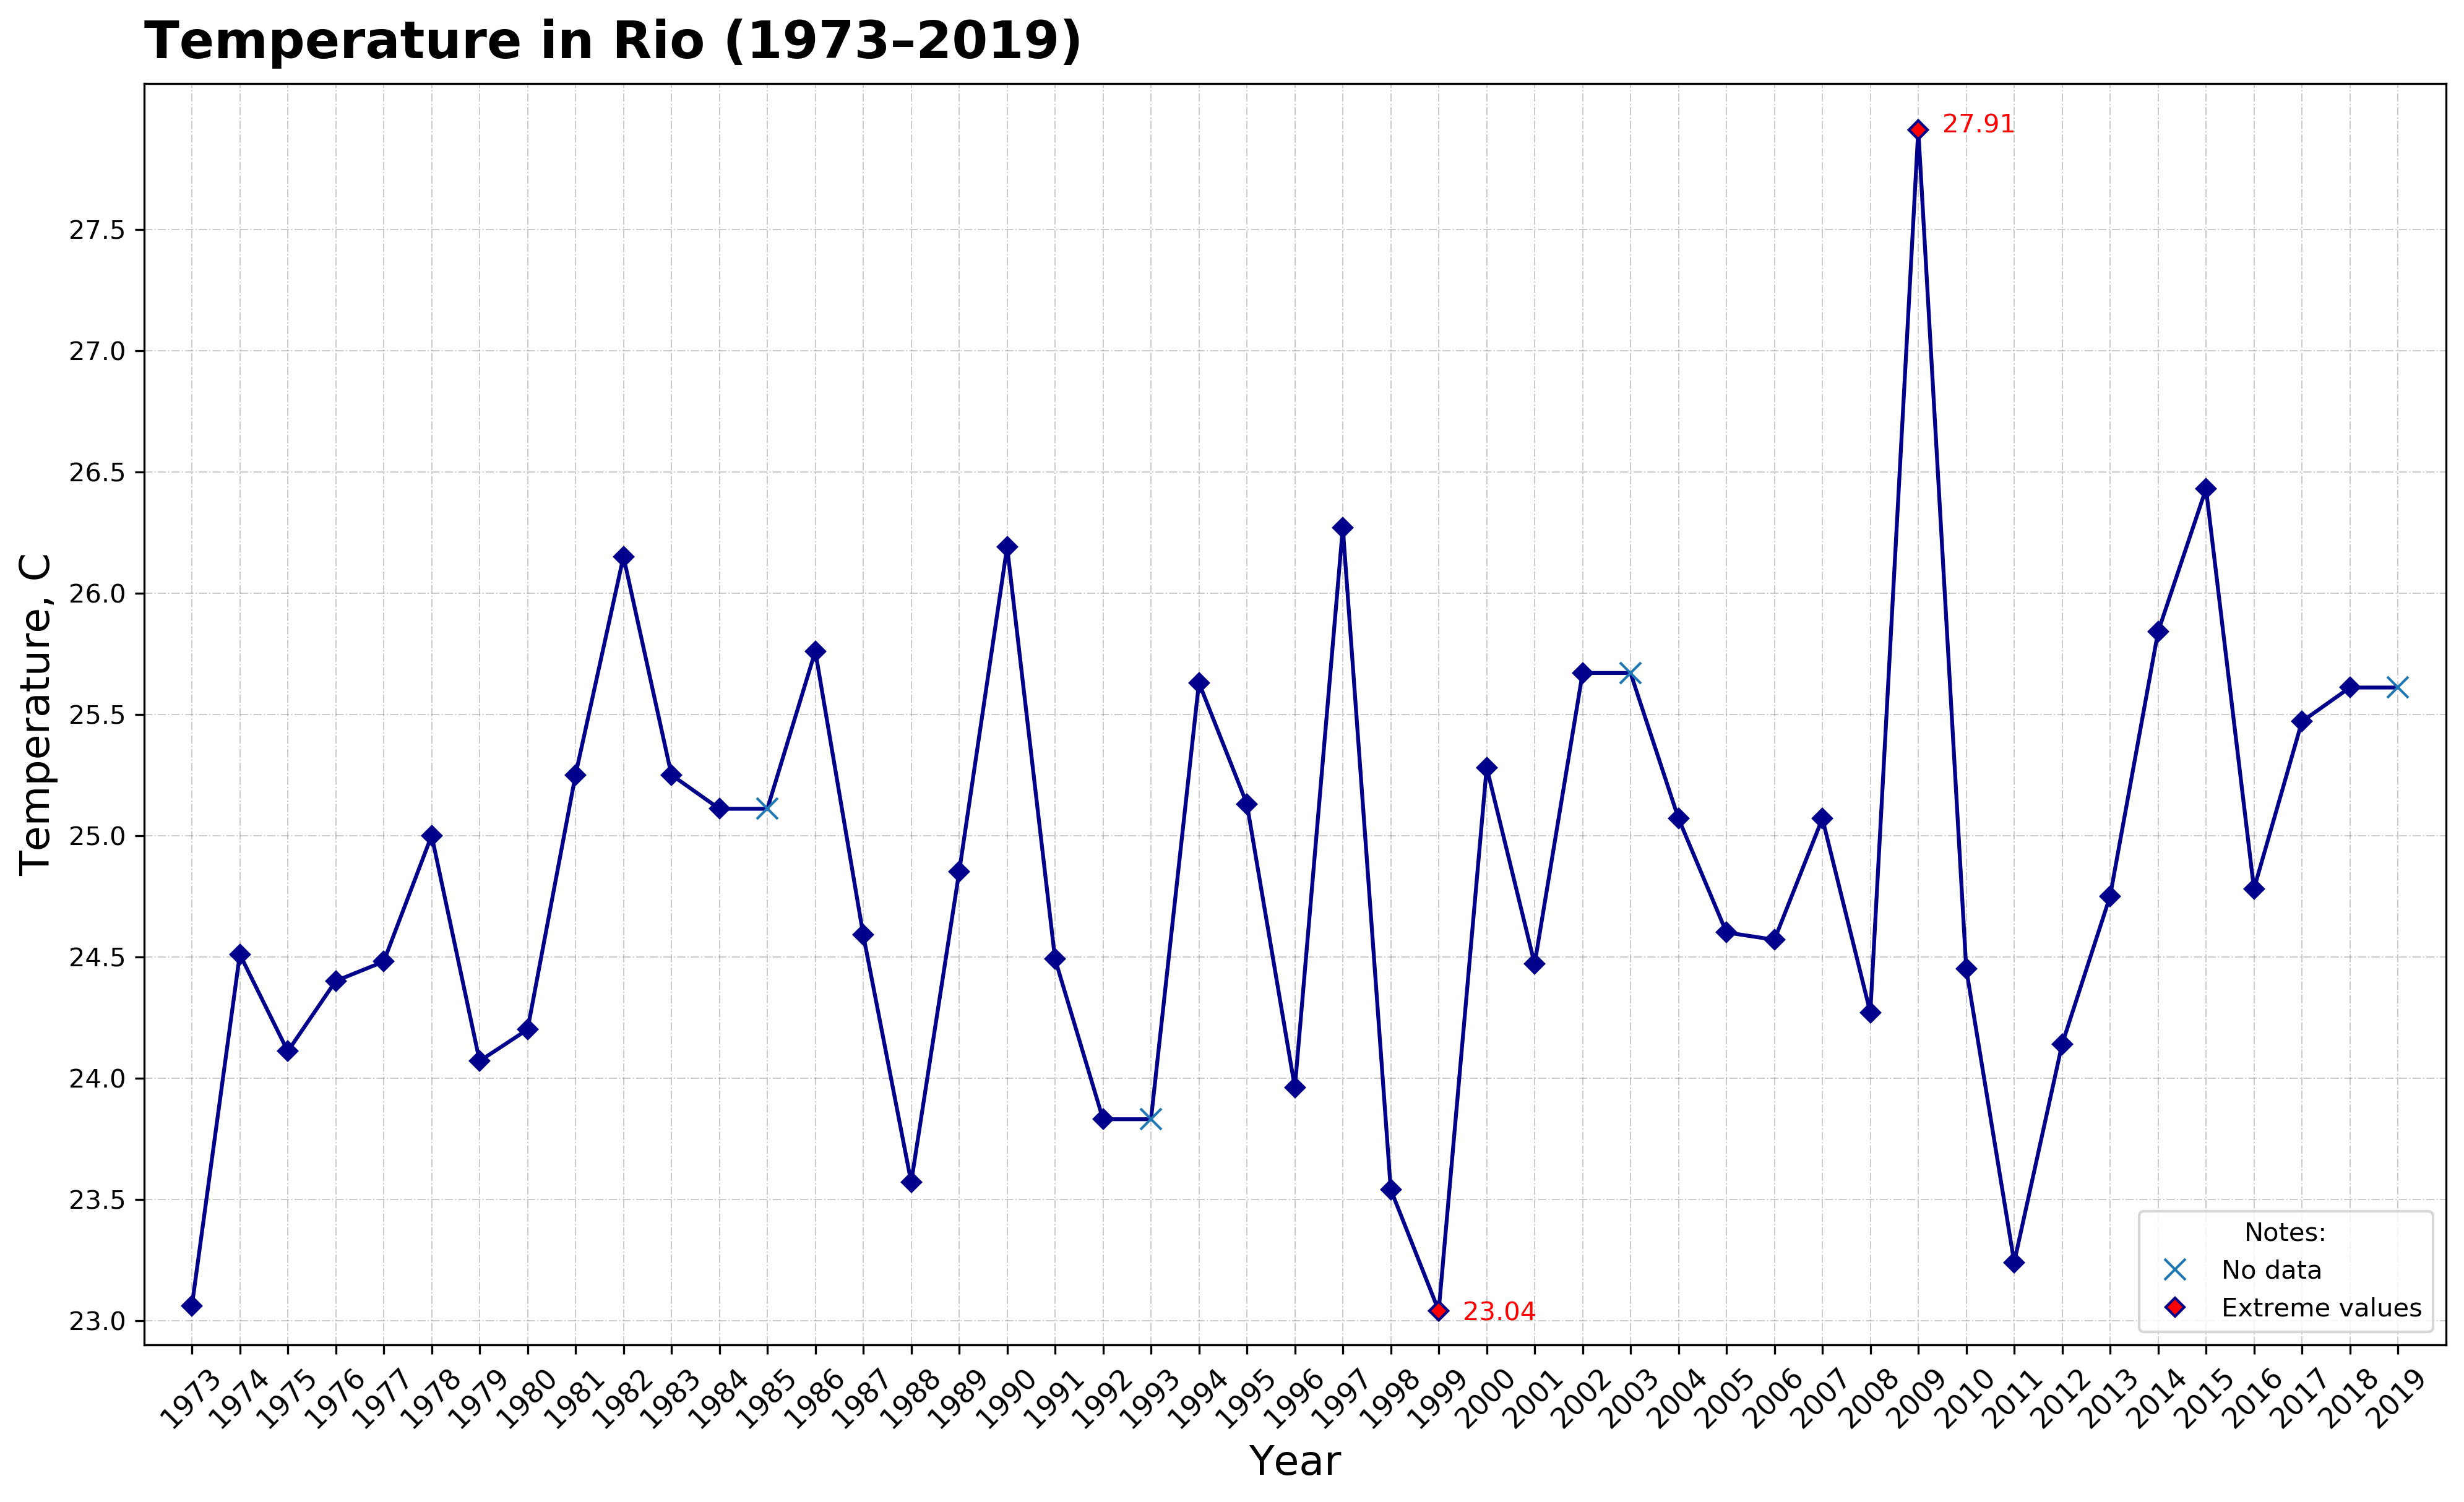

In [40]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 


ax.plot(df["YEAR"], df["NOV"], color = "darkblue")
ax.plot(good["YEAR"], good["NOV"], color = "darkblue", linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "darkblue")

# нужен label
ax.plot([1985, 1993, 2003, 2019], [25.11, 23.83, 25.67, 25.61], linestyle = "",
        marker = "x", markersize = 8, markerfacecolor = "darkblue", label = "No data")

# нужен label
ax.plot([1999, 2009], [23.04, 27.91], linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue", 
        label = "Extreme values")

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})


ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio (1973–2019)", 
             loc = "left", 
             pad = 10,
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})

ax.text(1999.5, 23, "23.04", color = "red")
ax.text(2009.5, 27.9, "27.91", color = "red")

# легенда в правом нижнем углу
# с заголовком title
ax.legend(loc = "lower right", title = "Notes:")


ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);

### Бонус: последний аккорд – добавляем линию тренда

Для тех, кто знаком с линейной регрессией: линия тренда – просто линия регрессии, где зависимой переменной выступает температура воздуха, а независимой – год. Для построения регрессии возьмем функцию `polyfit()` из библиотеки `numpy`. Эта функция выполняет «подгонку» с помощью многочлена некоторой степени, в нашем случае степень равна 1, так как нас интересует обычная линейная модель:

In [41]:
coef = np.polyfit(df["YEAR"], df["NOV"], 1)
coef

array([  0.01792206, -10.91541628])

Результаты, которые мы сохранили в `coef` – массив с коэффициентами линейной модели ($\beta_0$ и $\beta_1$).
На основе этих коэффициентов создадим оболочку – функцию, которая позволяет вычислить предсказанное значение Y по X:

In [42]:
trend = np.poly1d(coef)
trend

poly1d([  0.01792206, -10.91541628])

Осталось только задействовать эту функцию для вычисления значений по оси Y (температура) на основе значений X (год) и добавить соответствующую линию на график:

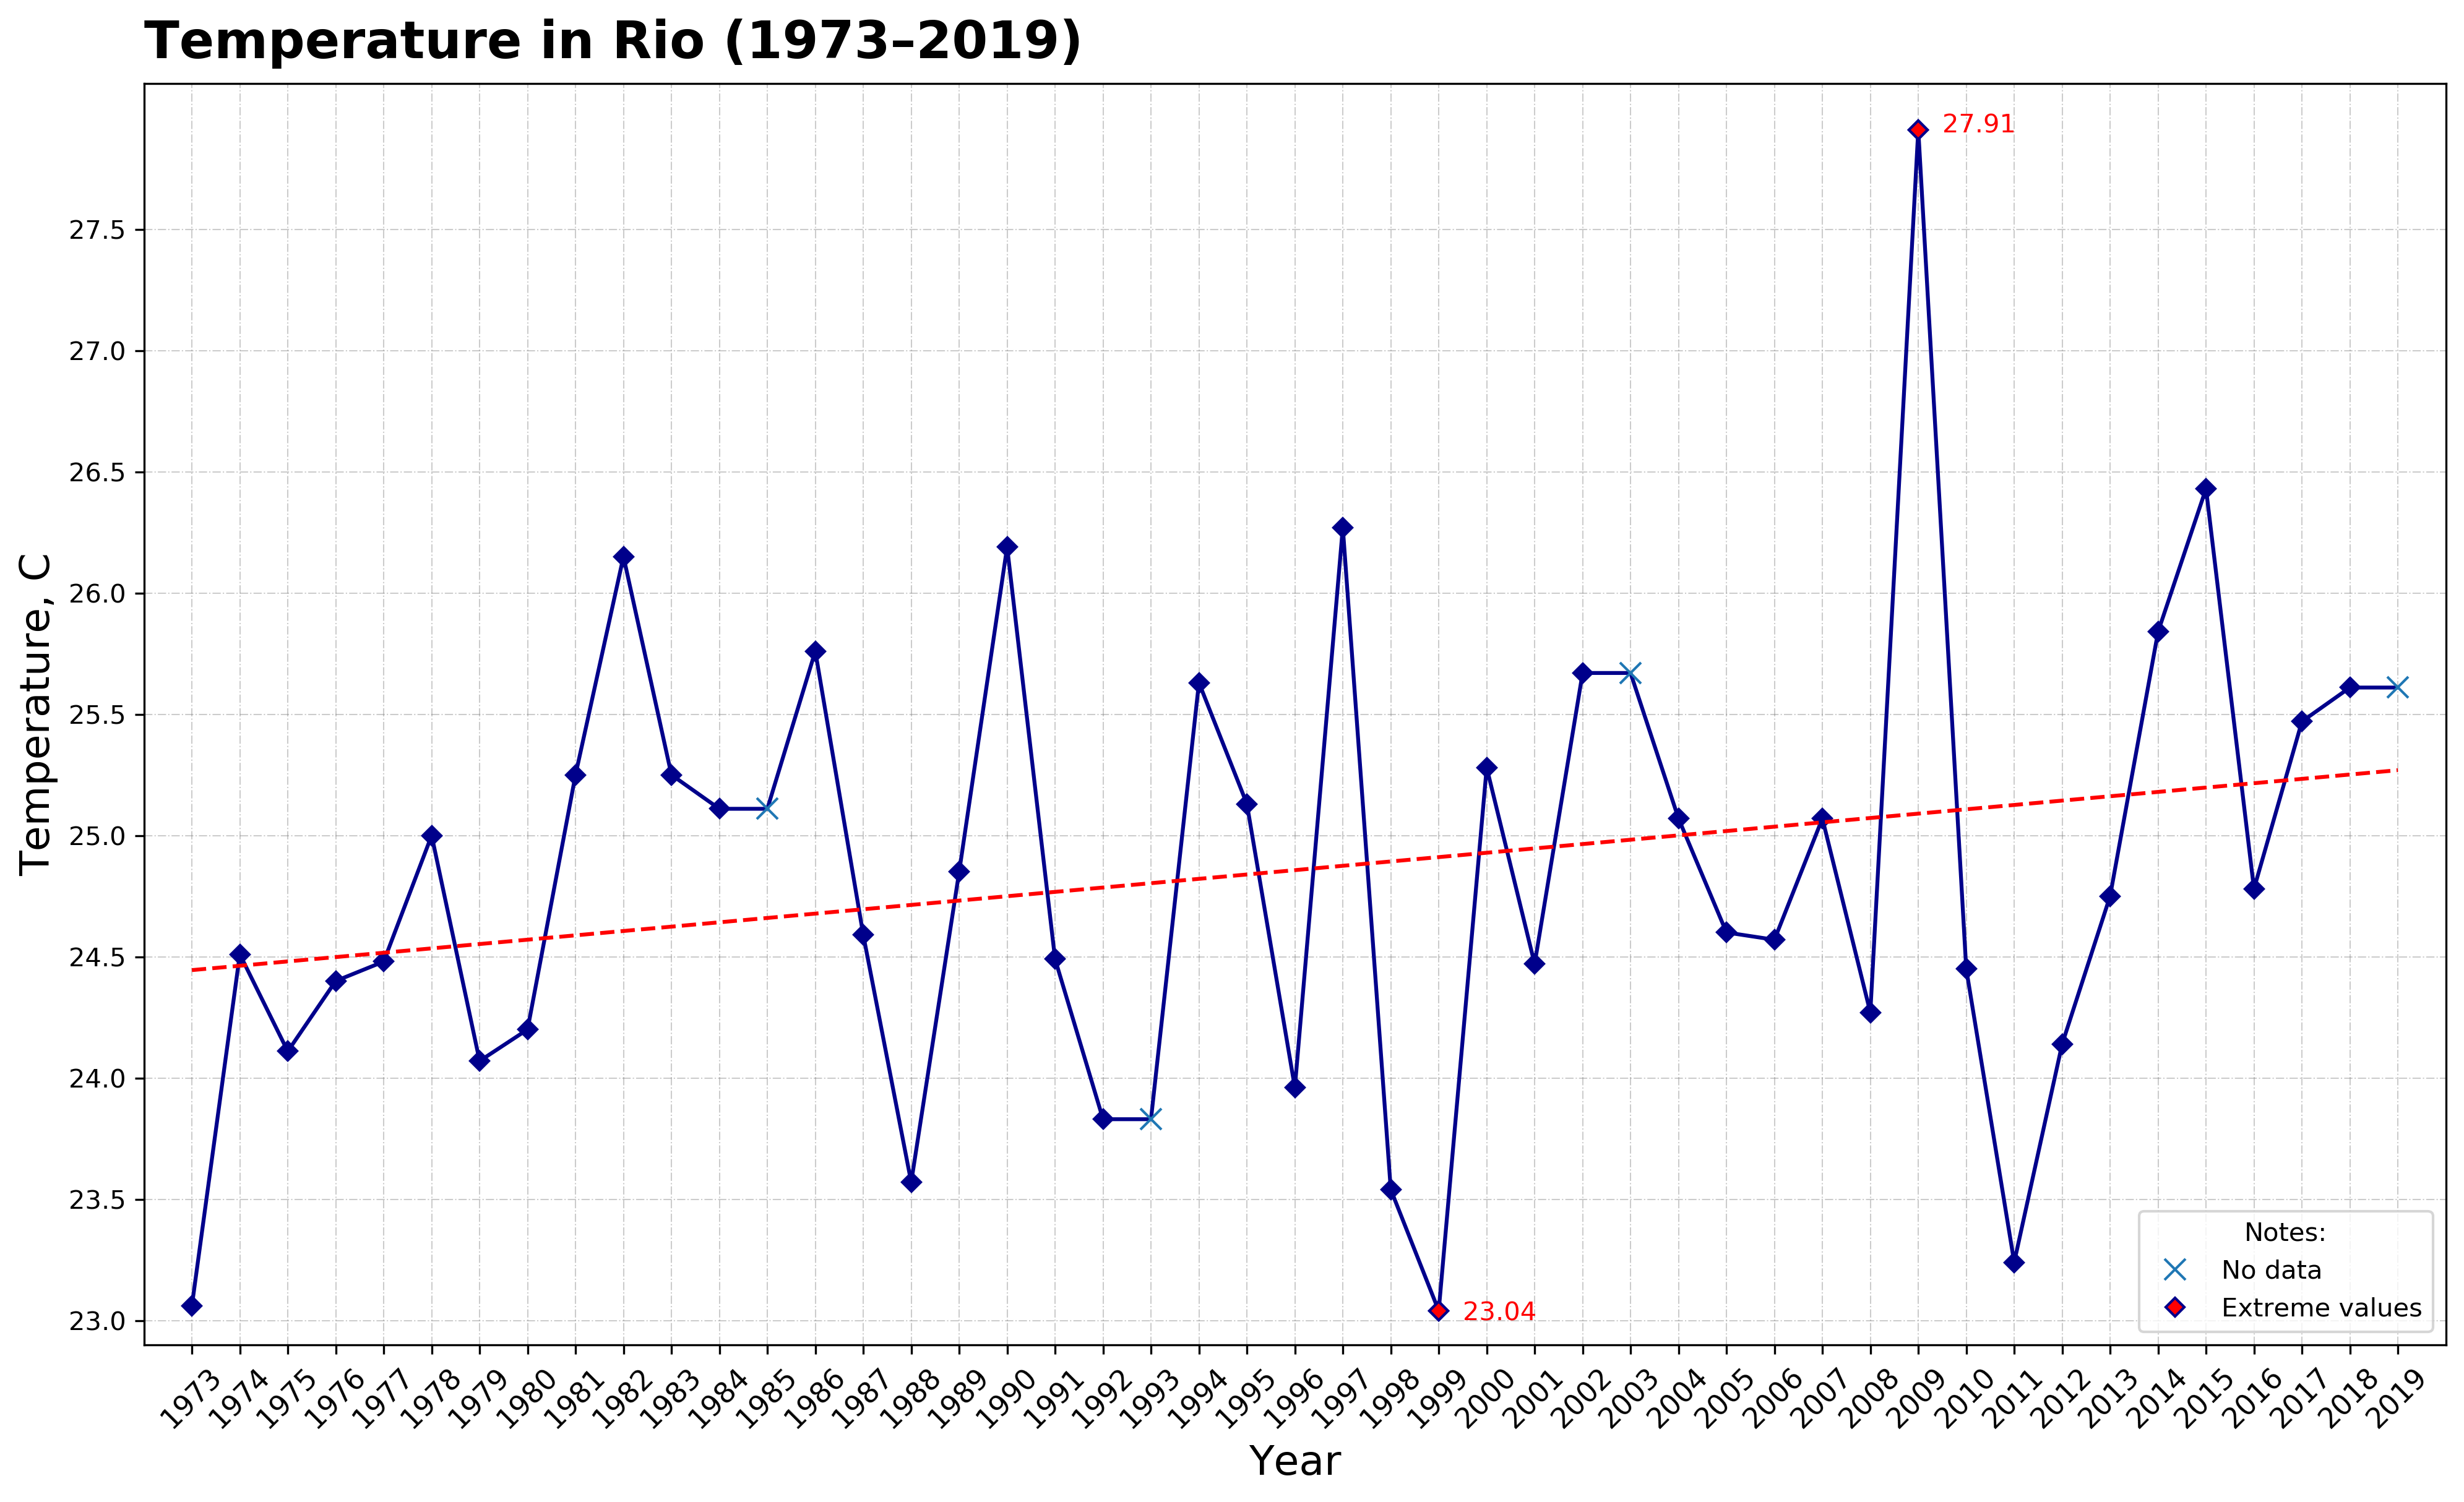

In [43]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 300) 


ax.plot(df["YEAR"], df["NOV"], color = "darkblue")

ax.plot(good["YEAR"], good["NOV"], color = "darkblue", linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "darkblue")

ax.plot([1985, 1993, 2003, 2019], [25.11, 23.83, 25.67, 25.61], linestyle = "",
        marker = "x", markersize = 8, markerfacecolor = "darkblue", label = "No data")

ax.plot([1999, 2009], [23.04, 27.91], linestyle = "",
        marker = "D", markersize = 5, markerfacecolor = "red", markeredgecolor = "darkblue", 
        label = "Extreme values")

# еще один график – линия тренда
# год vs предсказанные с помощью оболочки trend() значения температуры

ax.plot(df["YEAR"], trend(df["YEAR"]), linestyle = "--", color = "red")

ax.set_xlim(left = 1972, right = 2020)
ax.set_ylim(bottom = 22.9, top = 28.1)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation = 45, fontdict = {'fontsize': 11})


ax.set_xlabel("Year", fontdict = {'fontsize': 16})
ax.set_ylabel("Temperature, C", fontdict = {'fontsize': 16})
ax.set_title("Temperature in Rio (1973–2019)", 
             loc = "left", 
             pad = 10,
             fontdict = {'fontsize': 20, 'fontweight': "semibold"})

ax.text(1999.5, 23, "23.04", color = "red")
ax.text(2009.5, 27.9, "27.91", color = "red")

ax.legend(loc = "lower right", title = "Notes:")


ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', linewidth = 0.5, alpha = 0.4);